In [ ]:
#https://github.com/ljjhhh/DM-homework

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
co_path ='E:\dataset'
os.chdir(co_path)
os.listdir(co_path)

['2019_pitches.csv', 'winemag-data_first150k.csv']

In [2]:
# 给出数据的基本信息，主要用于判断标称属性和数值属性
def print_basic1(df):
    print(df.info())
    print(df.shape)
    return None

def print_basic2(df,new_df):
    print(df.info())
    print(df.shape)
    print();
    print(new_df.info())
    print(new_df.shape)  
    return None

# 标称属性每个可能取值的频数及直方图
def print_nominal1(df,nominal_index=None,head_n=50):
    # 根据频数绘制直方图
    def bar_describe(data,head_n=50):
        plt.figure(figsize=(24,8))
        plt.title(data.name, fontsize=30)    
        plt.bar(data.index[:head_n], data.values[:head_n])
        plt.xticks(rotation=90)
        plt.show()
            
    # 获取数据中每个取值的频数
    frequency = {key: df[key].value_counts() for key in df.columns}
        
    if nominal_index is None:
        nominal_index=df.columns
    for key in nominal_index:
        bar_describe(data=frequency[key],head_n=head_n)
    return None

def print_nominal2(df,nominal_index=None,head_n=50,new_df=None):
    # 根据频数绘制直方图
    def bar_describe(data,new_data,head_n=50):
        plt.figure(figsize=(24,8))
        plt.title(data.name, fontsize=30)    
        plt.bar(data.index[:head_n], data.values[:head_n],color='r',label=data.name)
        plt.xticks(rotation=90)
        
        plt.figure(figsize=(24,8))
        plt.title('new_'+new_data.name,fontsize=30)
        plt.bar(new_data.index[:head_n],new_data.values[:head_n],color='g',label='new_'+new_data.name)
        plt.xticks(rotation=90)
        plt.show()
            
    # 获取数据中每个取值的频数
    frequency = {key: df[key].value_counts() for key in df.columns}
    new_frequency = {key: new_df[key].value_counts() for key in new_df.columns}
        
    if nominal_index is None:
        nominal_index=df.columns
    for key in nominal_index:
        bar_describe(data=frequency[key],new_data=new_frequency[key],head_n=head_n)
    return None

# 数值属性缺失值个数及五数概括
def print_numerical1(df,numerical_index=None):
    shape=df.shape # 样本总数
    # 格式化输出五数概括和缺失值个数
    def data_describe(data):
        print('descriptive statistics (%s):' % data.name)
        info=data.describe()
            
        print("Min: {:.4f}\tQ1(25%): {:.4f} \tQ2(50%): {:.4f} \tQ3(75%): {:.4f} \tMax: {:.4f}".format(
            info['min'],info['25%'],info['50%'],info['75%'],info['max']))
        print("Missing: {:d}".format(int(shape[0] - info['count'])))
        print()
        
    if numerical_index is None:
        print("Please provide the numerical index needed to be describe")
        return None
    
    # 获取数值属性的5数概况和缺失值个数
    for key in numerical_index:
        data_describe(df[key])
    
    return None

def print_numerical2(df,numerical_index=None,new_df=None):
    shape=df.shape # 样本总数
    # 格式化输出五数概括和缺失值个数
    def data_describe(data,new_data=None):
        print('descriptive statistics (%s):' % data.name)
        info=data.describe()
        new_info = new_data.describe()
            
        print("Min: {:.4f}\tQ1(25%): {:.4f} \tQ2(50%): {:.4f} \tQ3(75%): {:.4f} \tMax: {:.4f}".format(
            info['min'],info['25%'],info['50%'],info['75%'],info['max']))
        print("Missing: {:d}".format(int(shape[0] - info['count'])))
        print()
        
        print("\033[95m new Min: {:.4f}\tQ1(25%): {:.4f} \tQ2(50%): {:.4f} \tQ3(75%): {:.4f} \tMax: {:.4f} \033[0m".format(
        new_info['min'],new_info['25%'],new_info['50%'],new_info['75%'],new_info['max']))
        print("\033[95m new Missing: {:d} \033[0m".format(int(shape[0] - new_info['count'])))
        print()
        
    if numerical_index is None:
        print("Please provide the numerical index needed to be describe")
        return None
    
    # 获取数值属性的5数概况和缺失值个数
    for key in numerical_index:
        data_describe(df[key],new_df[key])
    
    return None

"""
数据可视化

    使用直方图、盒图等检查数据分布及离群点
"""
# 数据可视化，用于绘制数值属性的直方图，盒图及散点图
def box_plot1(df,ylabel=None):
    plt.figure()
    plt.title('Boxplot')
    sns.boxplot(y=ylabel,data=df,palette='Set2')
    return None
        
def box_plot2(df,ylabel=None,new_df=None):
    plt.figure(figsize=(14,8))
    plt.subplot(121)
    plt.title('Boxplot')
    sns.boxplot(y=ylabel,data=df,palette='Set1')

    plt.subplot(122)
    plt.title('new_Boxplot')
    sns.boxplot(y=ylabel,data=new_df,palette='Set2')
    return None
    
def hist_plot1(df,ylabel=None,bins=10):
    if ylabel is None:
        print("Please provide ylabel")
        return None
    plt.figure()
    plt.title('Histogram')
    sns.distplot(a=df[ylabel].dropna(),bins=bins,hist=True,kde=False)
    return None
        
def hist_plot2(df,ylabel=None,bins=10,new_df=None):
    if ylabel is None:
        print("Please provide ylabel")
        return None
    plt.figure(figsize=(14,8))
    plt.subplot(121)
    plt.title('Histogram')
    sns.distplot(a=df[ylabel].dropna(),bins=bins,hist=True,kde=False)

    plt.subplot(122)
    plt.title('new_Histogram')
    sns.distplot(a=new_df[ylabel].dropna(),bins=bins,hist=True,kde=False)
    return None

def scatter_plot1(df,xlabel=None,ylabel=None):
    if xlabel is None or ylabel is None:
        print("Please provide xlabel and ylabel")
        return None
    plt.figure()
    plt.title('Scatter plot')
    sns.scatterplot(x=xlabel,y=ylabel,data=df)
    return None
        
def scatter_plot2(df,xlabel=None,ylabel=None,new_df=None):
    if xlabel is None or ylabel is None:
        print("Please provide xlabel and ylabel")
        return None
    plt.figure(figsize=(14,8))
    plt.subplot(121)
    plt.title('Scatter plot')
    sns.scatterplot(x=xlabel,y=ylabel,data=df)

    plt.subplot(122)
    plt.title('new Scatter plot')
    sns.scatterplot(x=xlabel,y=ylabel,data=new_df)
    return None

def visualize1(df,ylabel=None,xlabel=None,bins=20):
    if ylabel is None or xlabel is None:
        print("Please provide xlabel and ylabel")
        return None
    box_plot1(df,ylabel=ylabel)
    box_plot1(df,ylabel=xlabel)
    hist_plot1(df,ylabel=ylabel,bins=bins)
    hist_plot1(df,ylabel=xlabel,bins=bins)
    scatter_plot1(df,xlabel=xlabel,ylabel=ylabel)
    
def visualize2(df,ylabel=None,xlabel=None,bins=20,new_df=None):
    if ylabel is None or xlabel is None:
        print("Please provide xlabel and ylabel")
        return None
    box_plot2(df,ylabel=ylabel,new_df=new_df)
    box_plot2(df,ylabel=xlabel,new_df=new_df)
    hist_plot2(df,ylabel=ylabel,bins=bins,new_df=new_df)
    hist_plot2(df,ylabel=xlabel,bins=bins,new_df=new_df)
    scatter_plot2(df,xlabel=xlabel,ylabel=ylabel,new_df=new_df)

"""
数据缺失值处理

    1. 将缺失部分剔除
    2. 用最高频率值来填补缺失值
    3. 通过属性的相关关系来填补缺失值
    4. 通过数据对象之间的相似性来填补缺失值
"""    
#将缺失部分剔除
def thedrop(df):
    return df.dropna(axis=0,inplace=False)

#用最高频率值来填补缺失值
def thefill(df):
    cpdf = df.copy(deep=True)
    for key in cpdf.columns:
        if df[key].describe()['count'] == 0:
            continue
        cpdf[key].fillna(cpdf[key].mode()[0],inplace=True)
    return cpdf

#通过属性的相关关系来填补缺失值
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
def therelationshipfill(df,miss_index,complete_index):
    def set_miss_values(df, complete_index):
        enc_label = OrdinalEncoder()
        enc_fea = OrdinalEncoder()
        missing_index = complete_index[0]
      
        # Take out the existing numerical data (no NaN) and throw them in Random Forest Regressor
        train_df = df[complete_index]
        # known & unknow values
        known_values = np.array(train_df[train_df[missing_index].notnull()])
        unknow_values = np.array(train_df[train_df[missing_index].isnull()])
        
        # y is the know missing_index
        y = known_values[:, 0].reshape(-1, 1)
        enc_label.fit(y)
        y = enc_label.transform(y)
        
        # X are the features
        X = known_values[:, 1:]
        test_X = unknow_values[:, 1:]
        all_X = np.row_stack((X,test_X))
        enc_fea.fit(all_X)
        X = enc_fea.transform(X)
        
        # fit
        rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
        rfr.fit(X, y.ravel())
        # predict
        predicted_values = rfr.predict(enc_fea.transform(unknow_values[:, 1:]))
        predicted_values = enc_label.inverse_transform(predicted_values.reshape(-1, 1))
        # fill in with predicted values
        df.loc[ (df[missing_index].isnull()), missing_index] = predicted_values
        return df
  
    cpdf = df.copy(deep=True)
    for i in range(0,len(miss_index)):
        complete_index.insert(0,miss_index[i])
        cpdf = set_miss_values(cpdf,complete_index)
    return cpdf


from impyute.imputation.cs import fast_knn
#通过数据对象之间的相似性来填补缺失值
def thesimilarityfill(df,numerical_index,k=30):
    sys.setrecursionlimit(100000) #Increase the recursion limit of the OS
    # start the KNN training
    cpdf = df.copy(deep=True)
    imputed_training=fast_knn(cpdf[numerical_index].values, k=k)
    imputed_training=pd.DataFrame(data=imputed_training,columns=numerical_index)
    cpdf[numerical_index] = imputed_training[numerical_index]
    return cpdf

In [3]:
winemag150k=pd.read_csv("winemag-data_first150k.csv",sep=',',header='infer',index_col=0)

print_basic1(winemag150k)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB
None
(150930, 10)


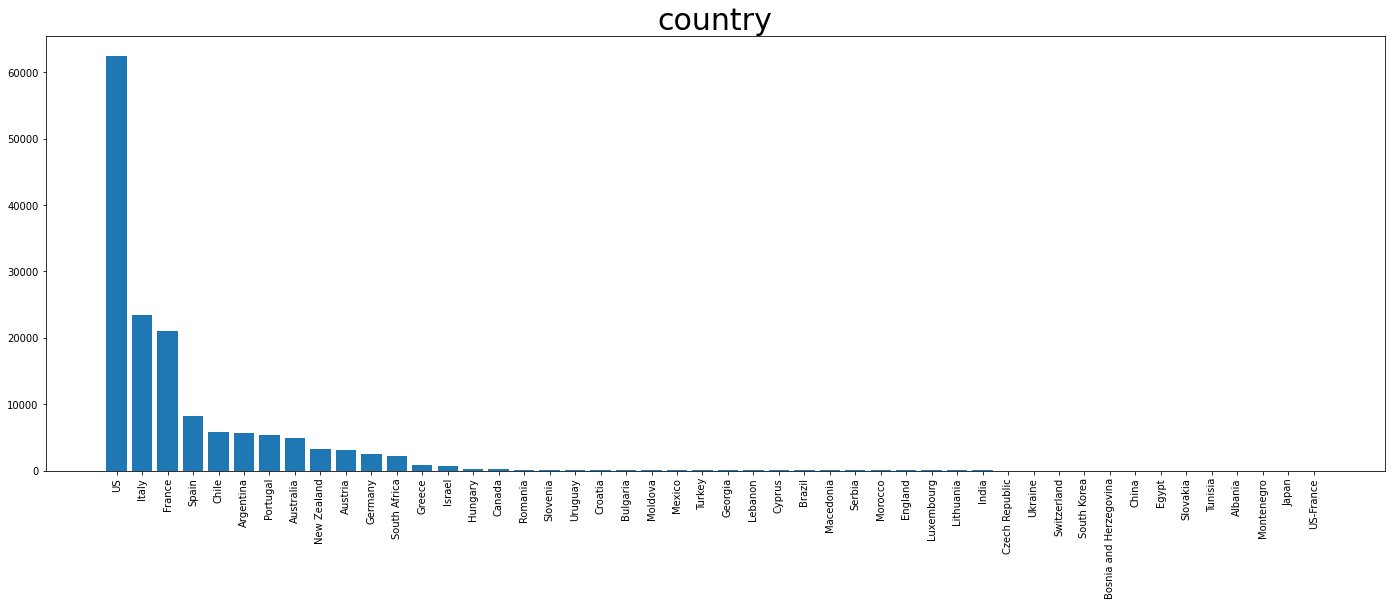

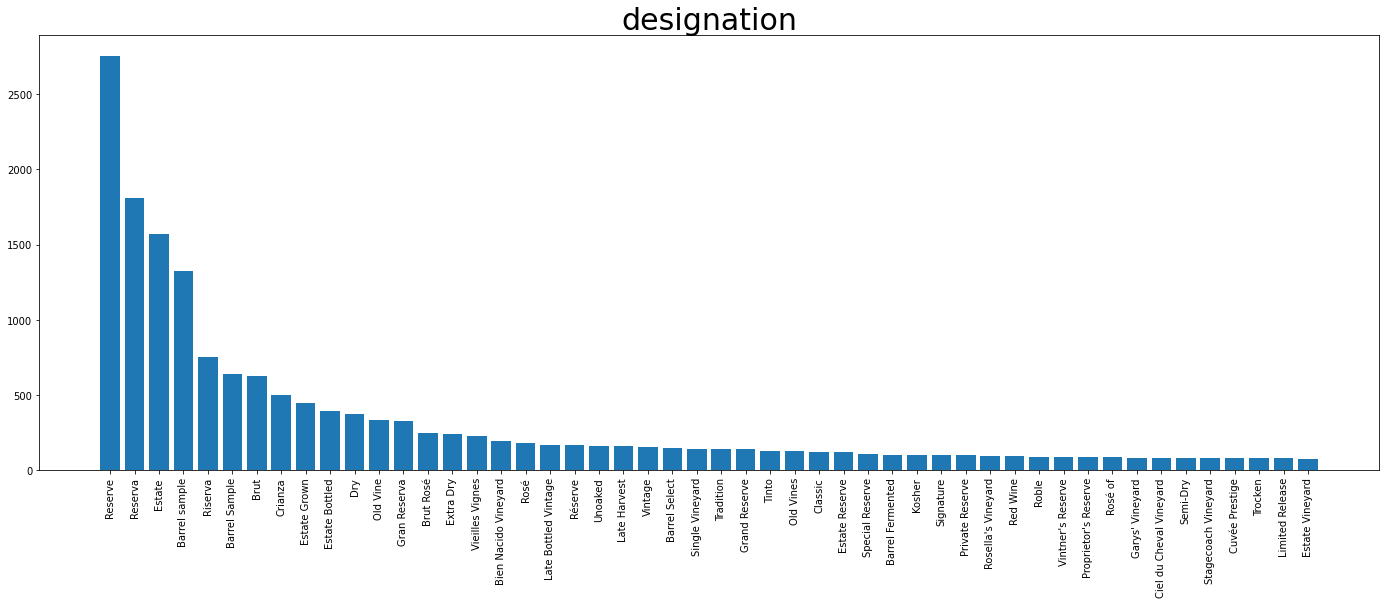

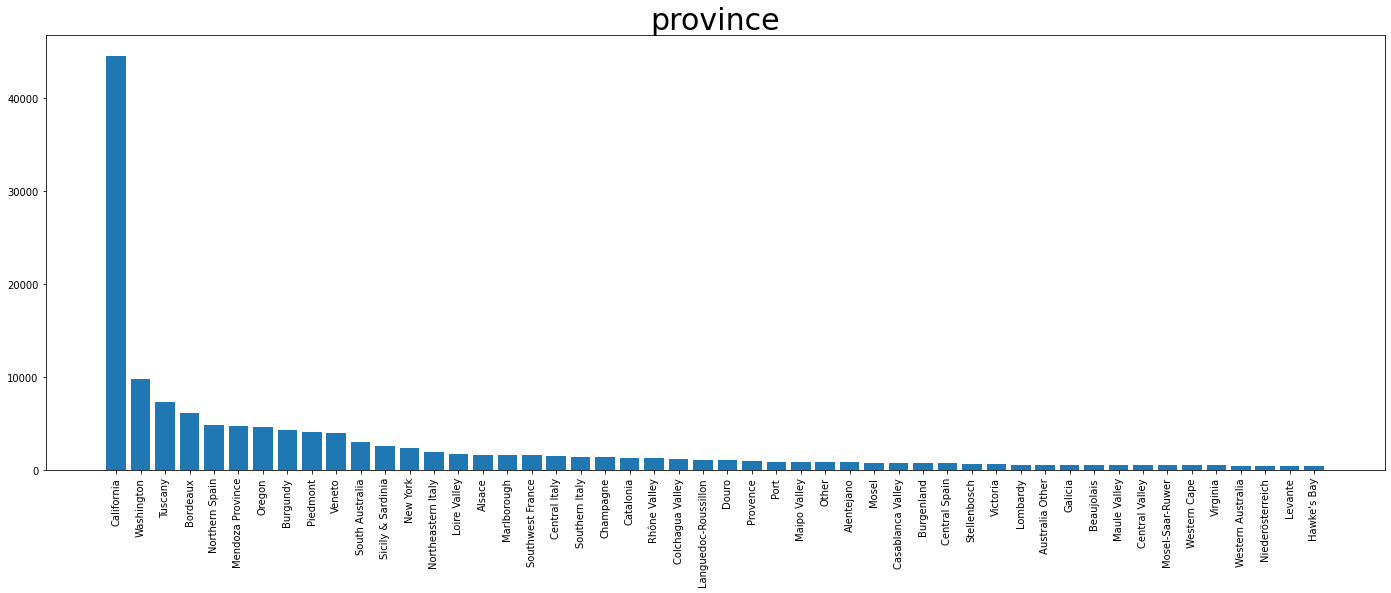

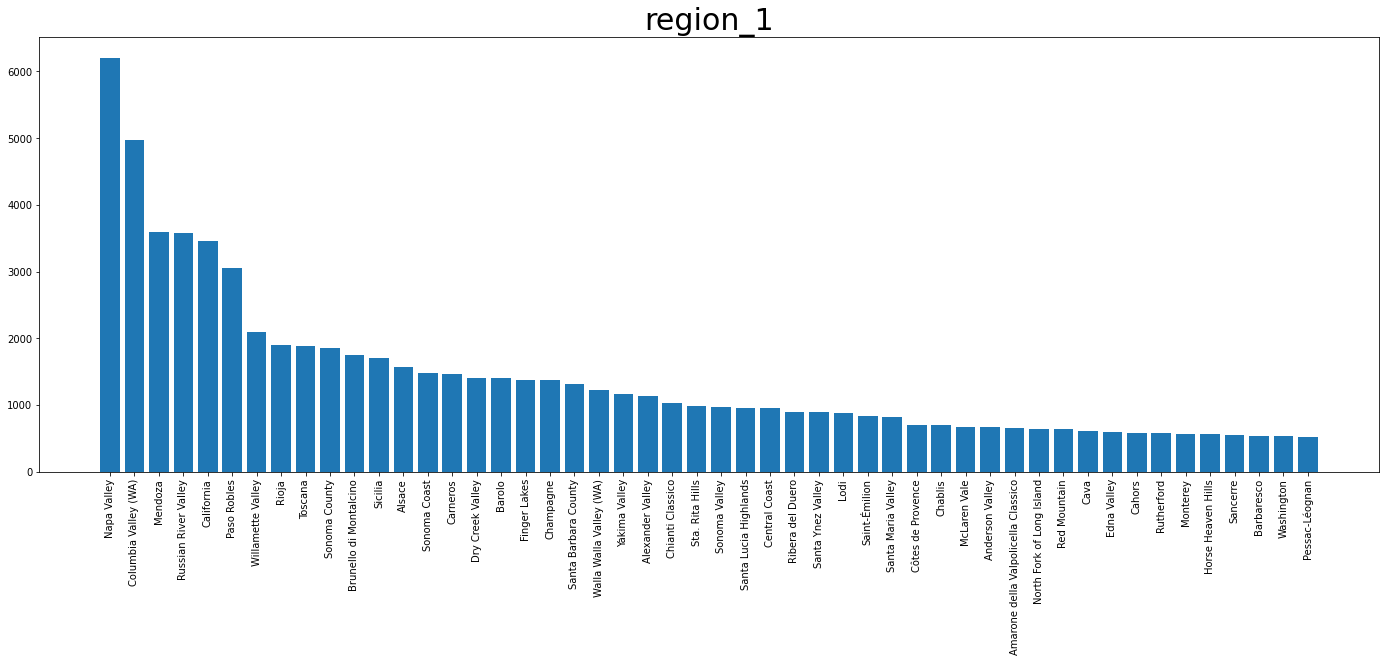

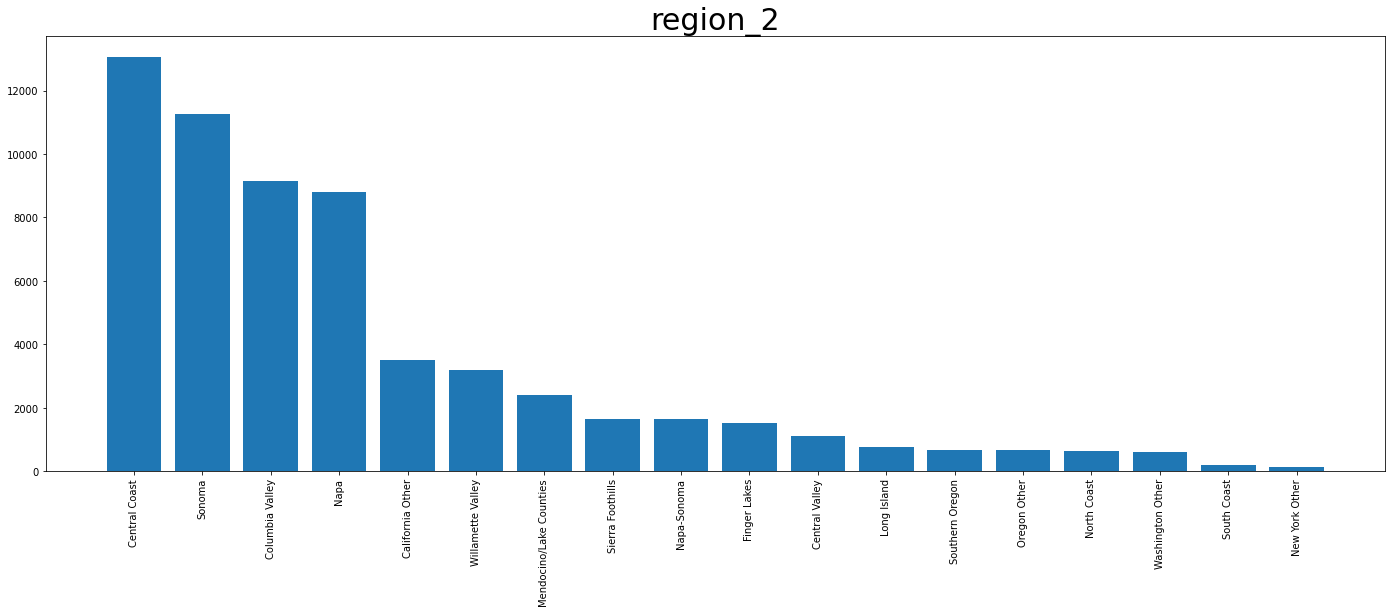

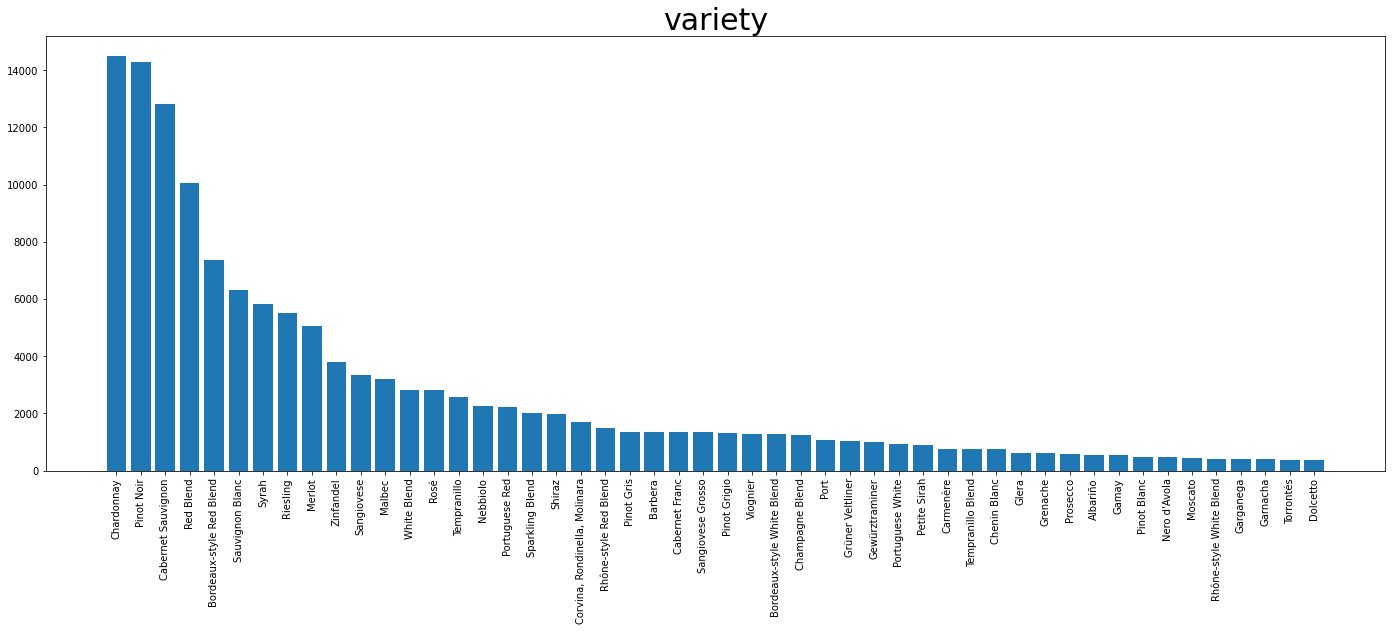

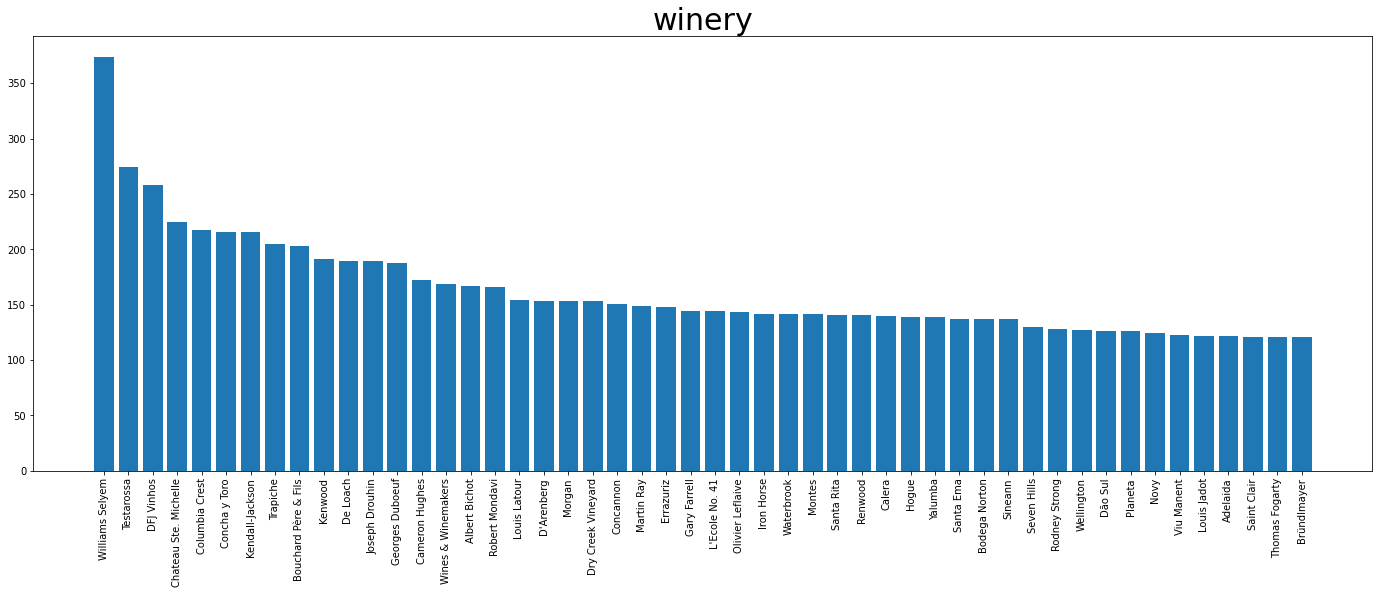

descriptive statistics (points):
Min: 80.0000	Q1(25%): 86.0000 	Q2(50%): 88.0000 	Q3(75%): 90.0000 	Max: 100.0000
Missing: 0

descriptive statistics (price):
Min: 4.0000	Q1(25%): 16.0000 	Q2(50%): 24.0000 	Q3(75%): 40.0000 	Max: 2300.0000
Missing: 13695



D:\environment\anaconda\anaconda\envs\sjwj\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB
None
(150930, 10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39241 entries, 0 to 150916
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      39241 non-null  object 
 1   description  39241 non-null  object 
 2   designat

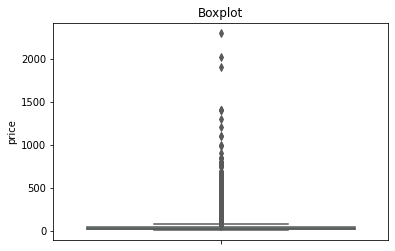

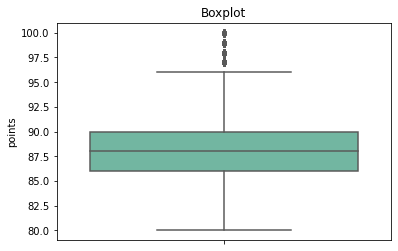

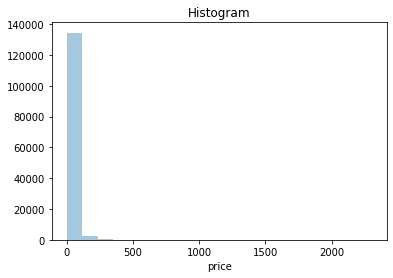

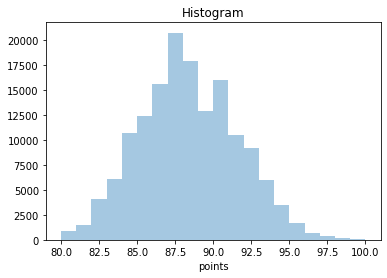

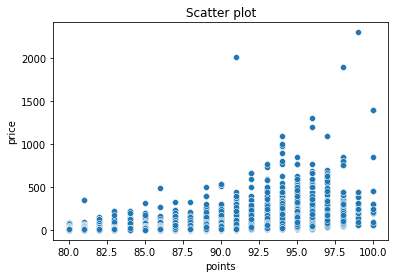

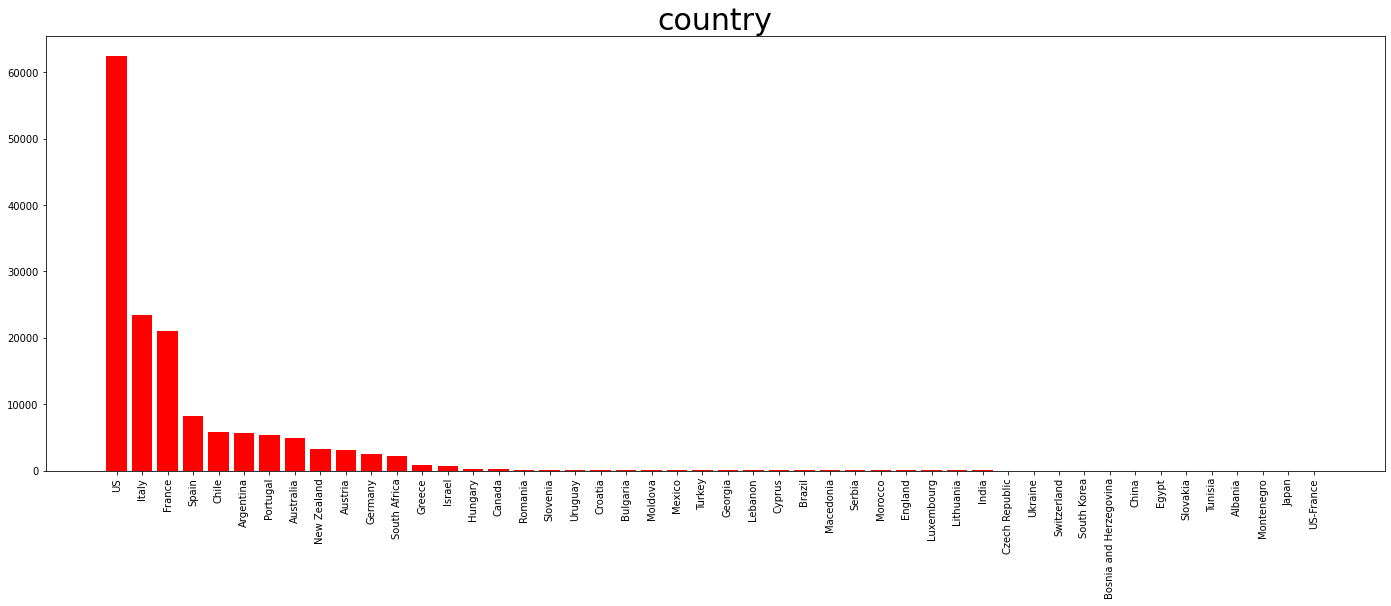

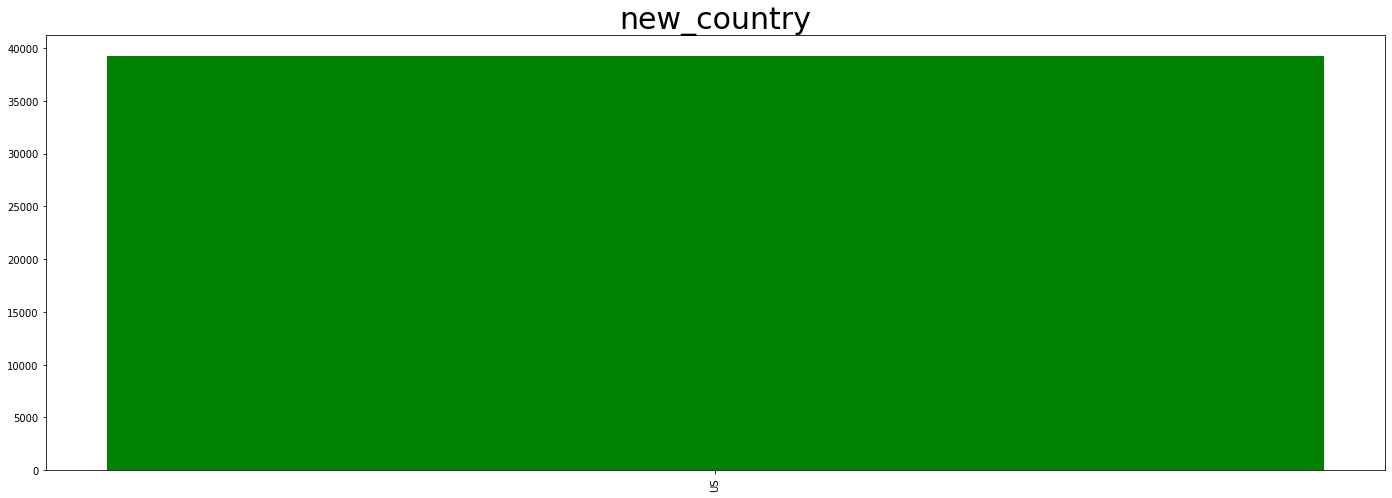

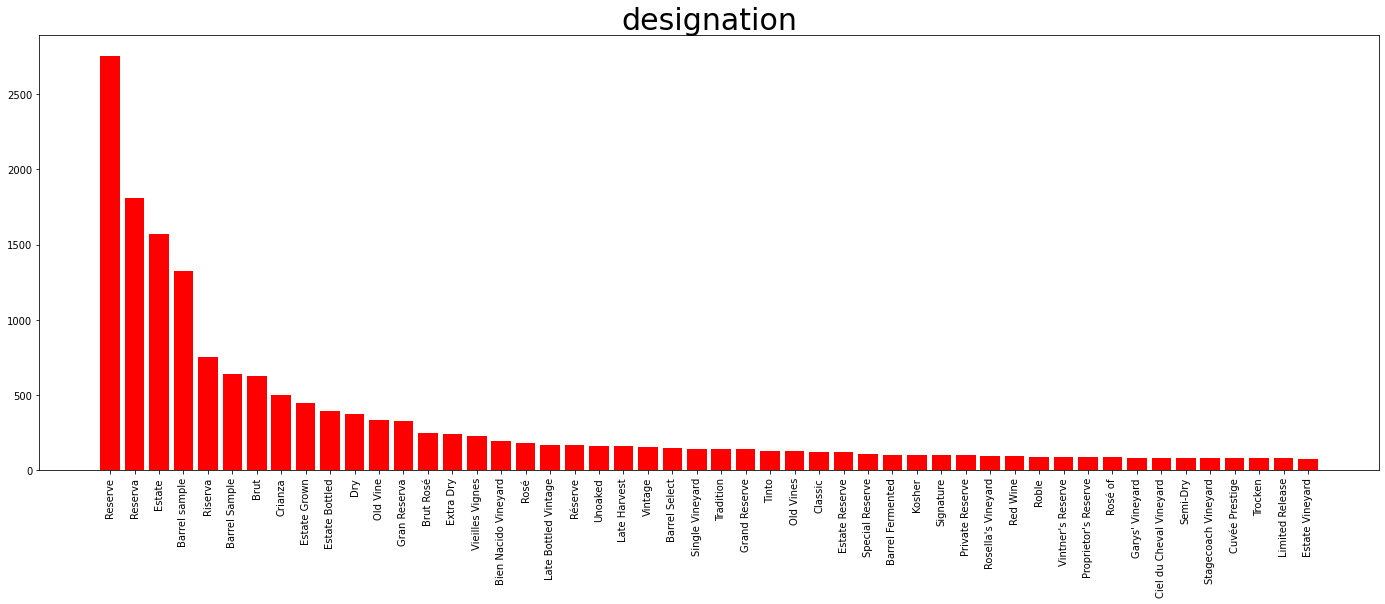

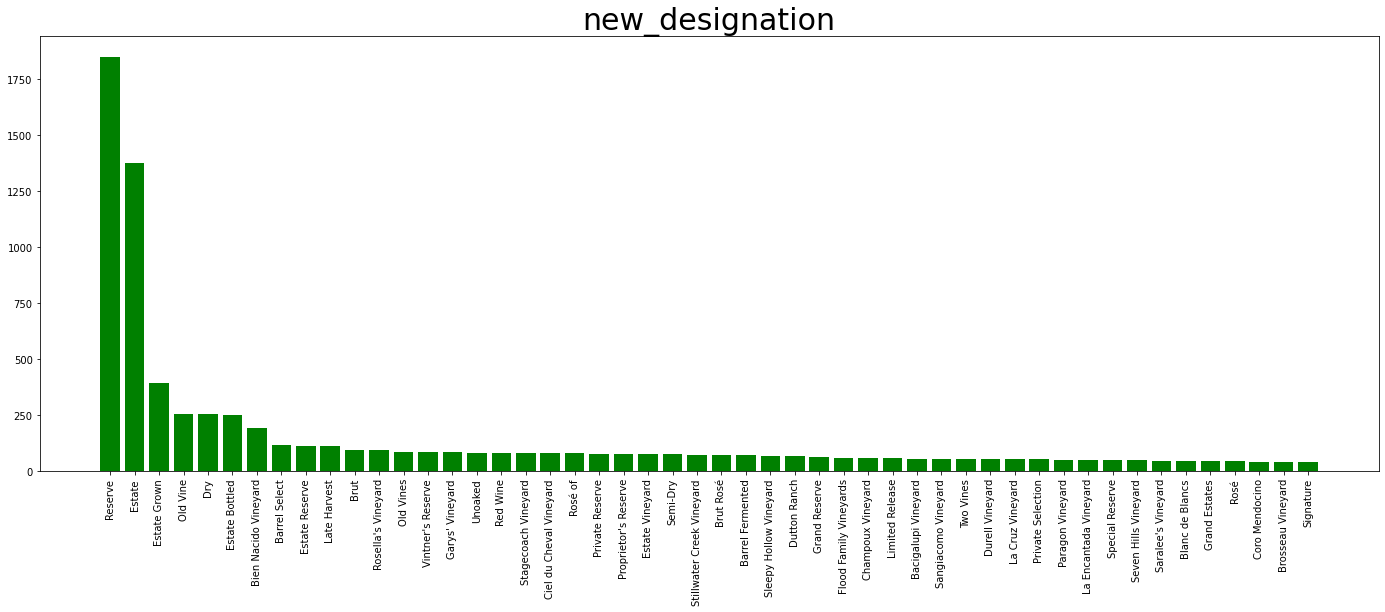

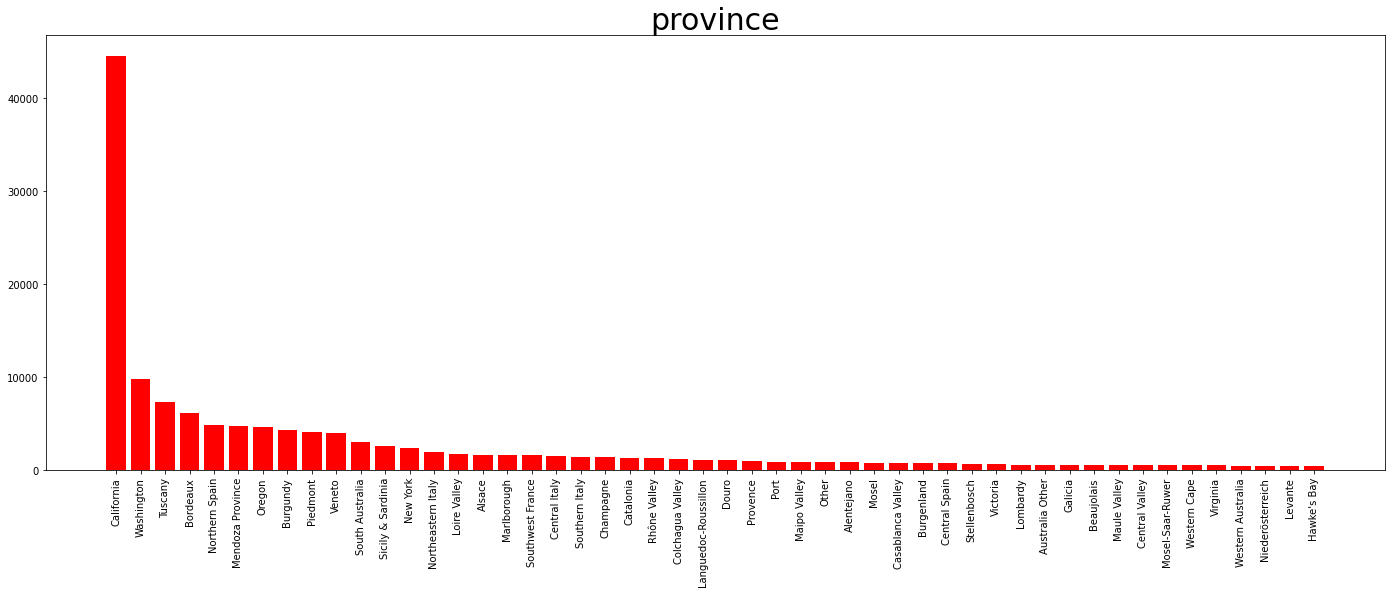

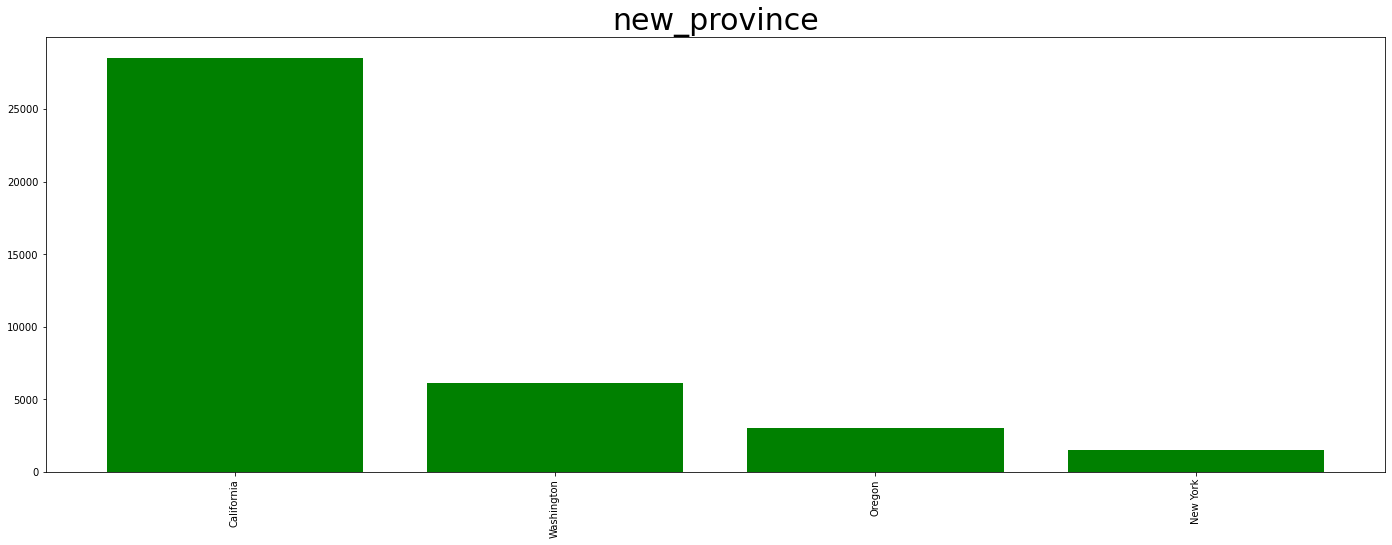

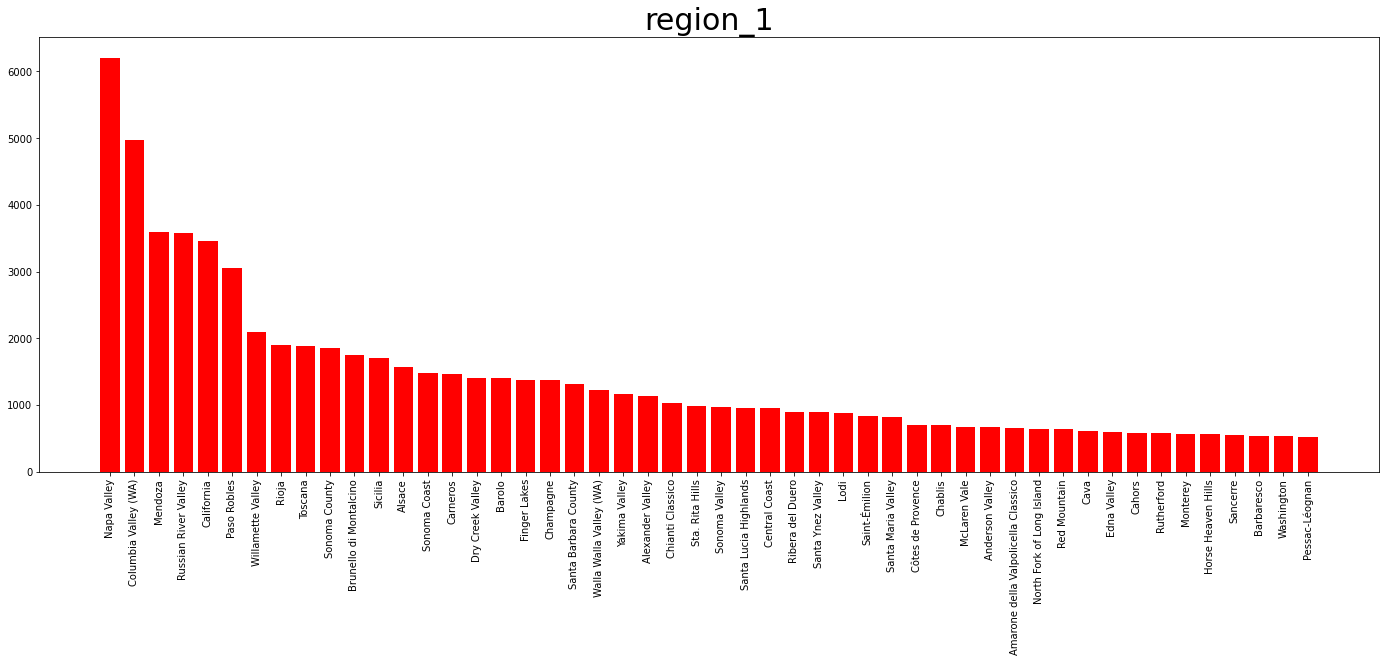

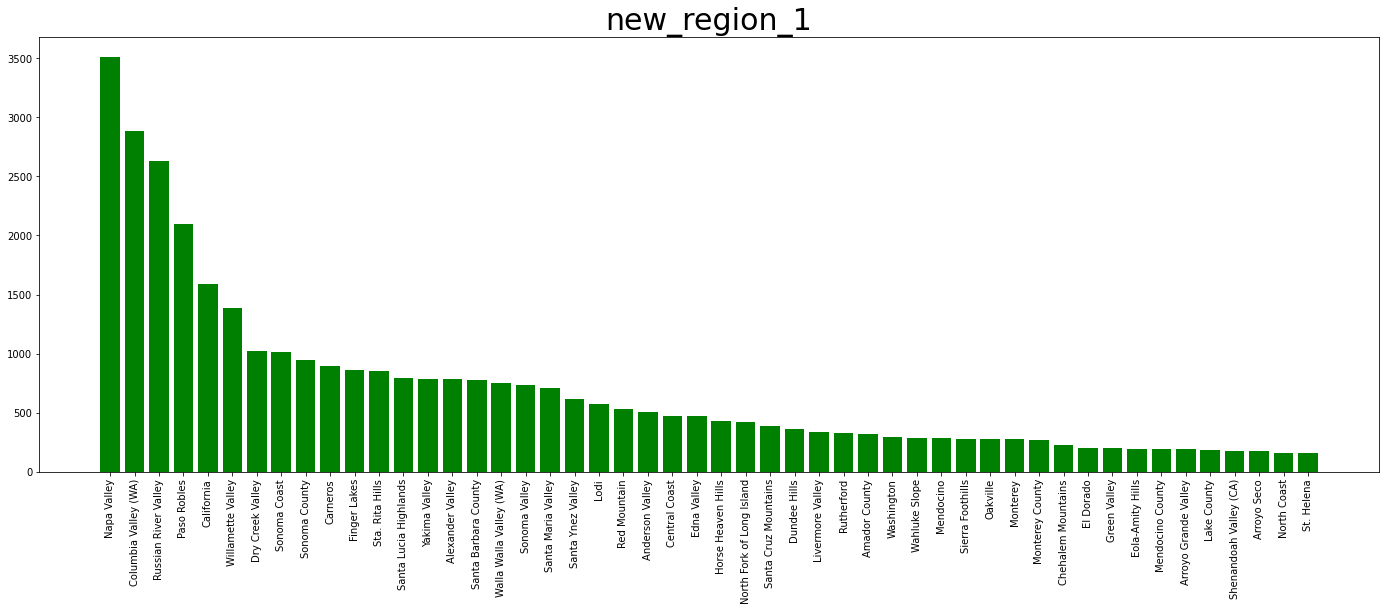

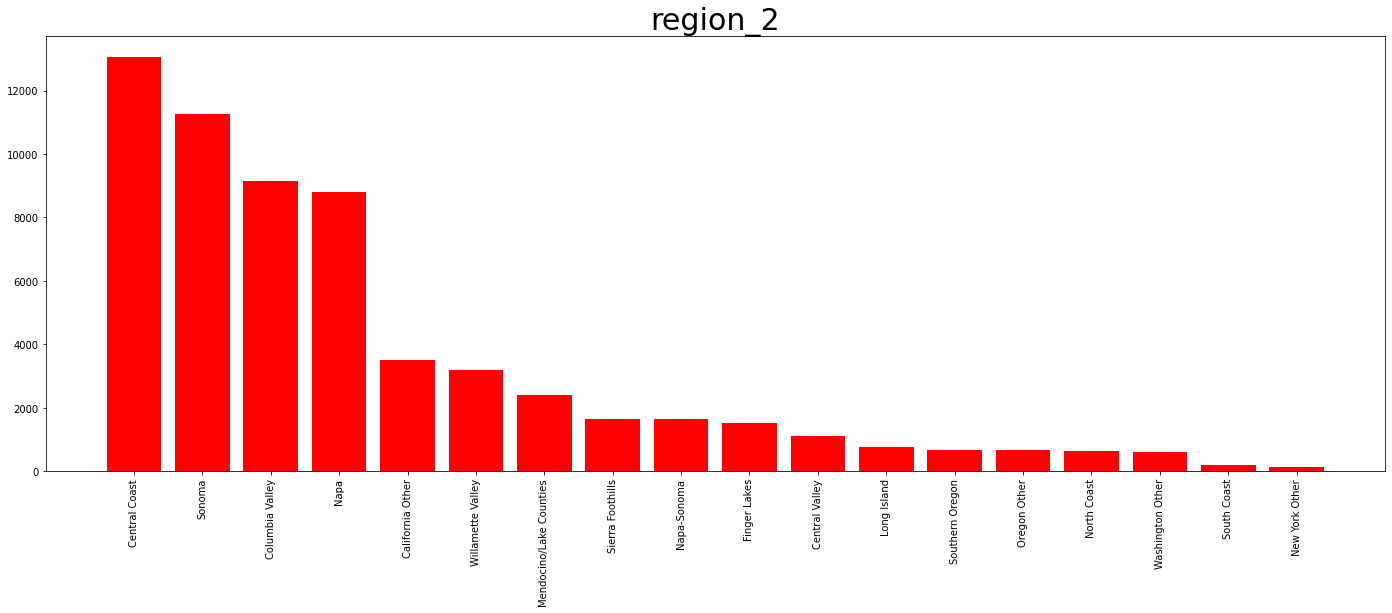

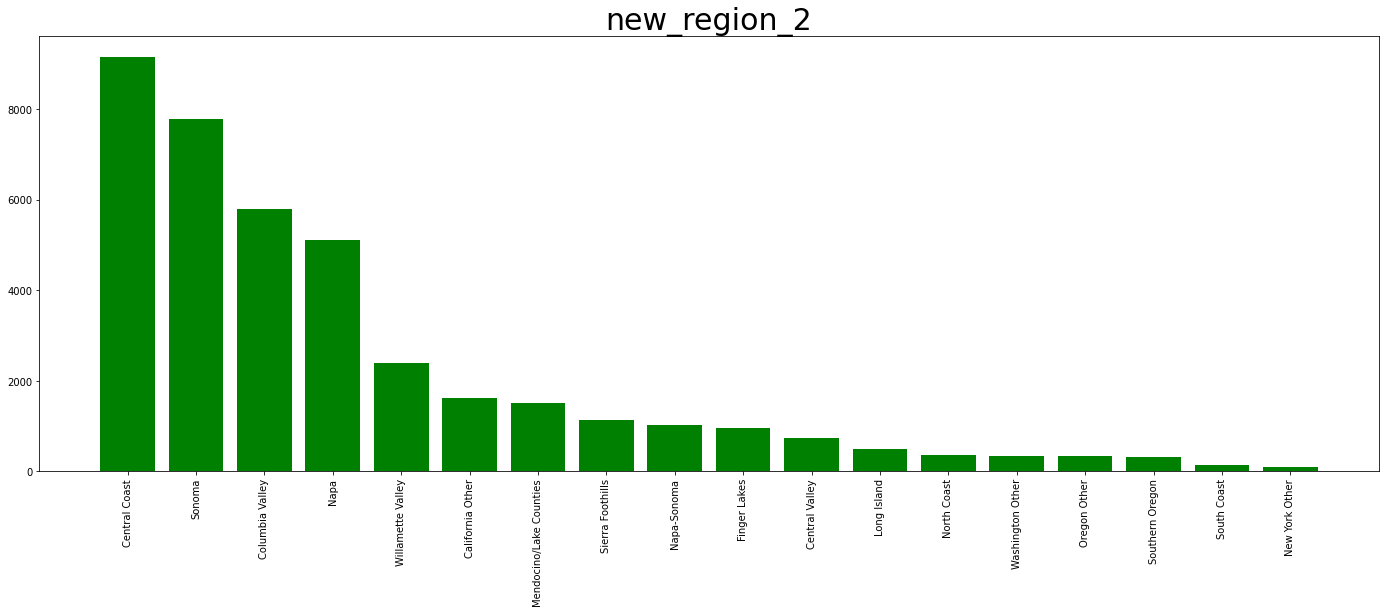

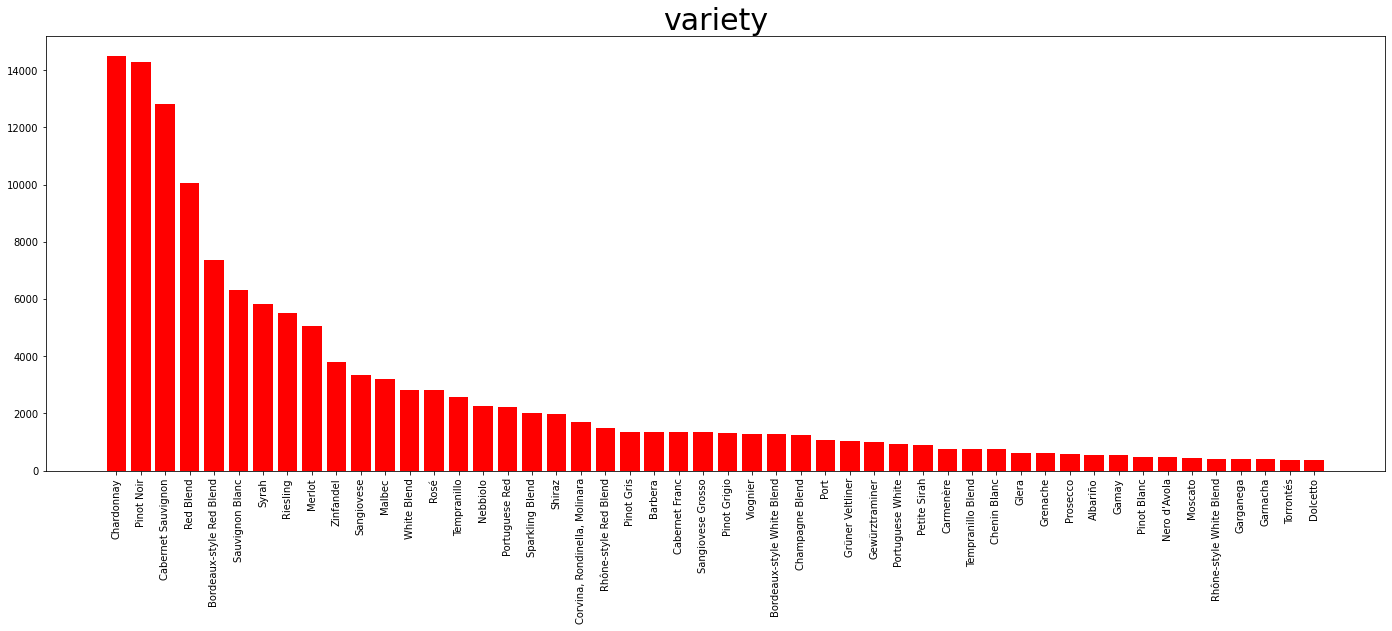

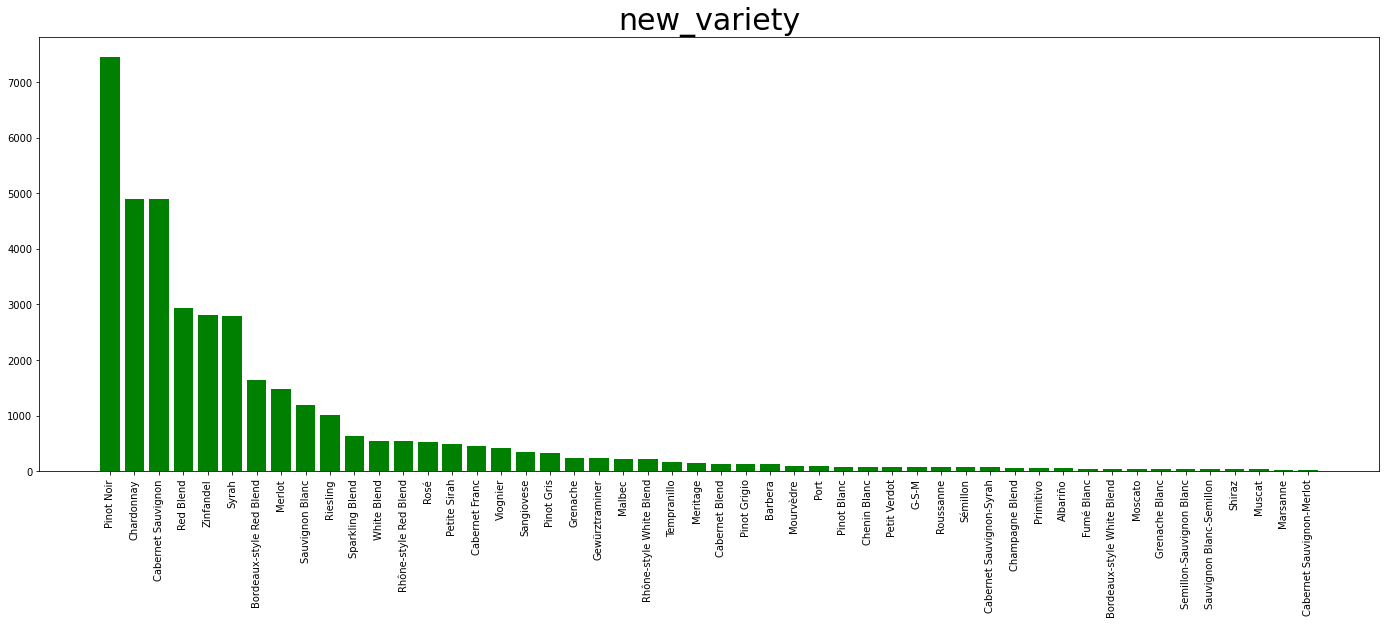

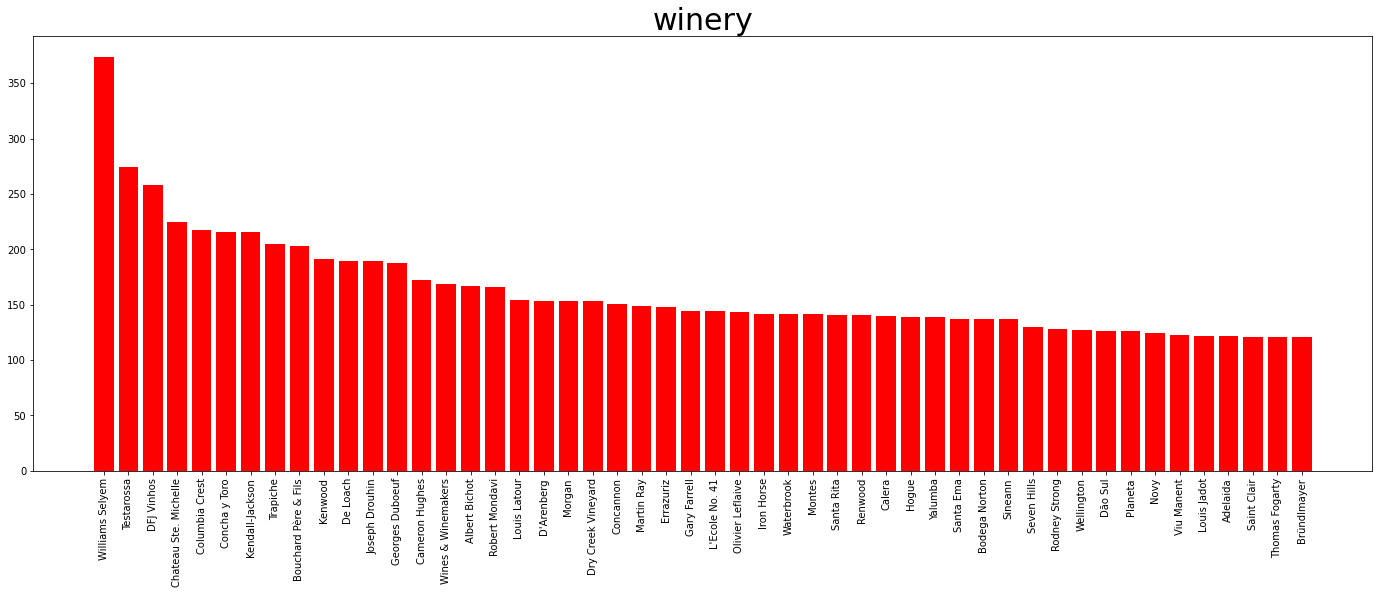

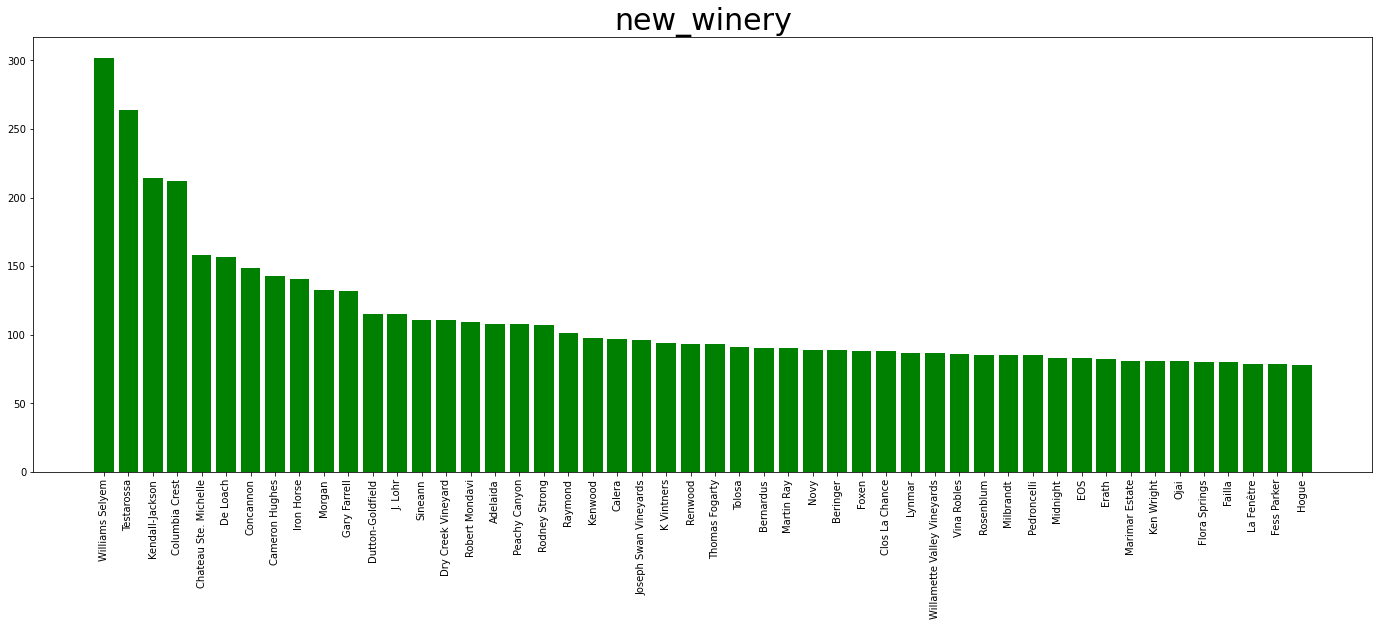

descriptive statistics (points):
Min: 80.0000	Q1(25%): 86.0000 	Q2(50%): 88.0000 	Q3(75%): 90.0000 	Max: 100.0000
Missing: 0

 new Min: 80.0000	Q1(25%): 86.0000 	Q2(50%): 88.0000 	Q3(75%): 91.0000 	Max: 100.0000 
 new Missing: 111689 

descriptive statistics (price):
Min: 4.0000	Q1(25%): 16.0000 	Q2(50%): 24.0000 	Q3(75%): 40.0000 	Max: 2300.0000
Missing: 13695

 new Min: 4.0000	Q1(25%): 22.0000 	Q2(50%): 32.0000 	Q3(75%): 45.0000 	Max: 2013.0000 
 new Missing: 111689 



D:\environment\anaconda\anaconda\envs\sjwj\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: name 'md150k' is not defined

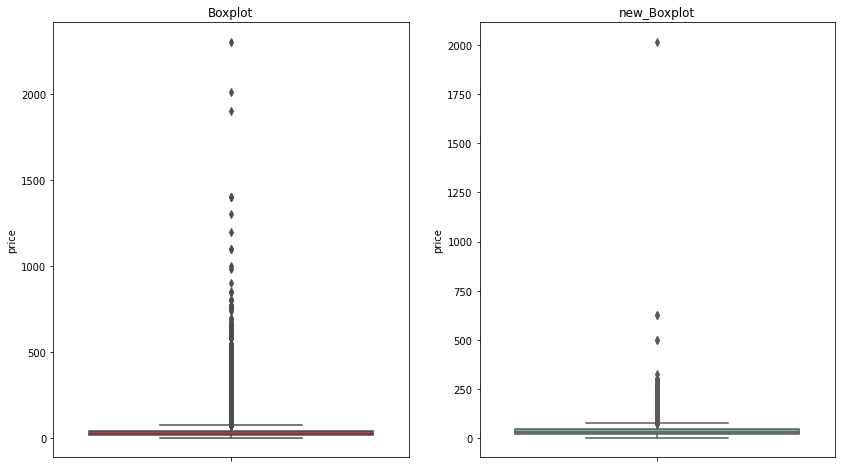

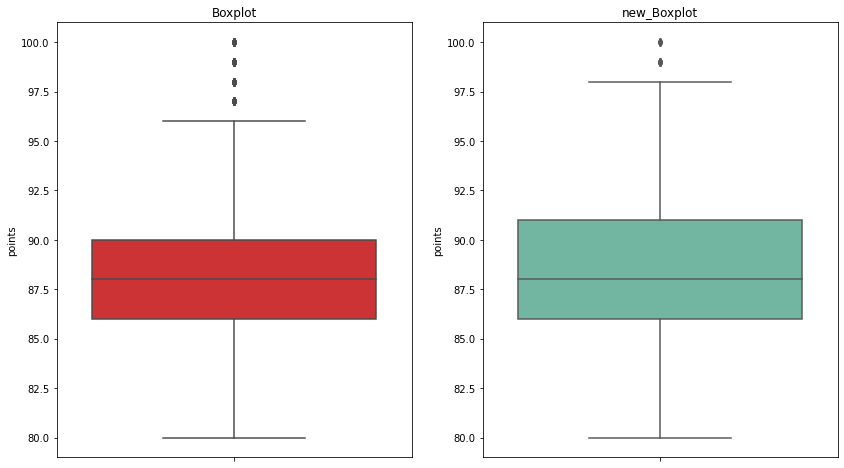

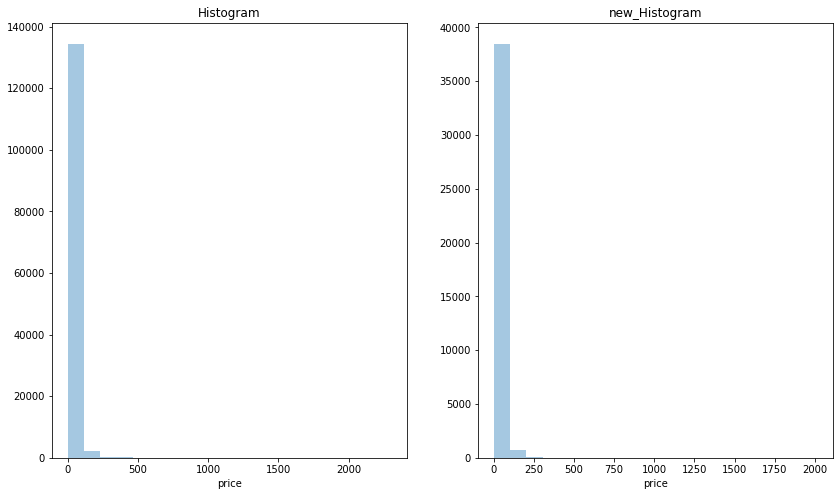

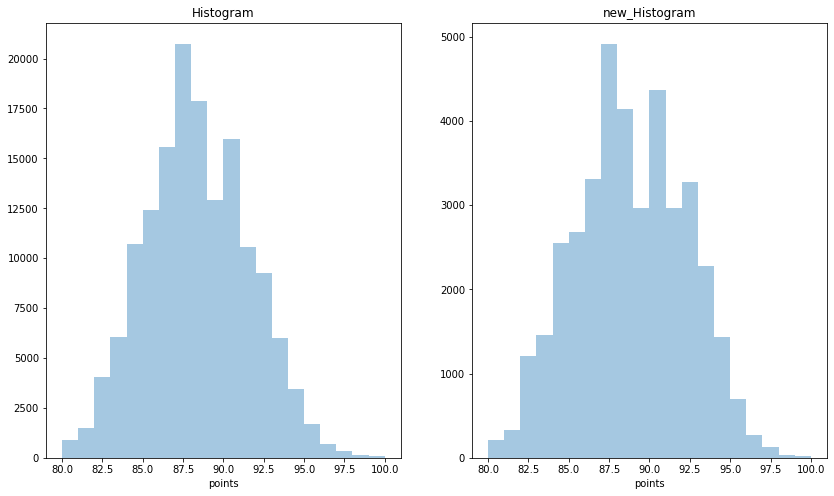

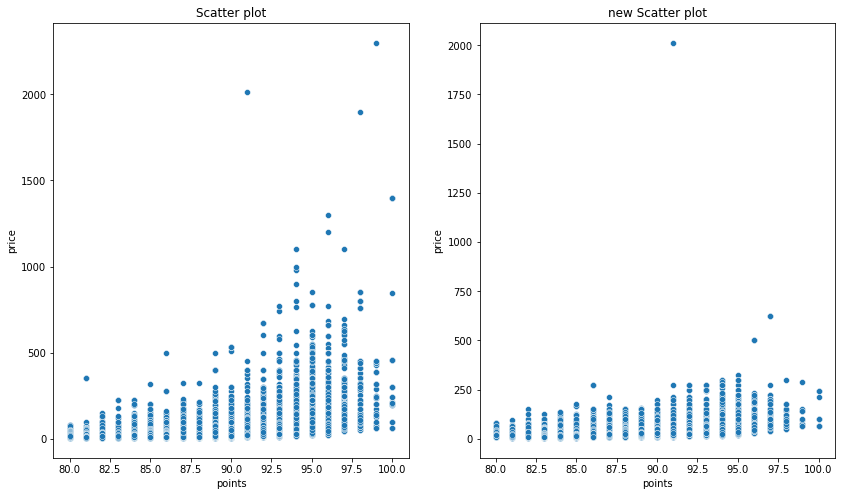

In [4]:
# Nominal index
nominal_index = ['country', 'designation', 'province', 'region_1', 'region_2', 'variety', 'winery']
# Numerical index
numerical_index = ['points', 'price']
print_nominal1(winemag150k,nominal_index=nominal_index,head_n=50)
print_numerical1(winemag150k,numerical_index=numerical_index)
visualize1(winemag150k,xlabel='points',ylabel='price',bins=20)

d150k=thedrop(winemag150k)
print_basic2(winemag150k,new_df=d150k)
print_nominal2(winemag150k,nominal_index=nominal_index,head_n=50,new_df=d150k)
print_numerical2(winemag150k,numerical_index=numerical_index,new_df=d150k)
visualize2(winemag150k,xlabel='points',ylabel='price',bins=20,new_df=d150k)

f150k=thefill(winemag150k)
print_basic2(winemag150k,new_df=md150k)
print_nominal2(winemag150k,nominal_index=nominal_index,head_n=50,new_df=f150k)
print_numerical2(winemag150k,numerical_index=numerical_index,new_df=f150k)
visualize2(winemag150k,xlabel='points',ylabel='price',bins=20,new_df=f150k)

miss_index=['country','designation','price','province','region_1','region_2']
comp_index=['description','points','variety','winery']
rf150k=therelationshipfill(winemag150k,miss_index=miss_index,complete_index=comp_index)
print_basic2(winemag150k,new_df=rf150k)
print_nominal2(winemag150k,nominal_index=nominal_index,head_n=50,new_df=rf150k)
print_numerical2(winemag150k,numerical_index=numerical_index,new_df=rf150k)
visualize2(winemag150k,xlabel='points',ylabel='price',bins=20,new_df=rf150k)

sf150k=thesimilarityfill(winemag150k,numerical_index=numerical_index,k=10)
print_basic2(winemag150k,new_df=sf150k)
print_nominal2(winemag150k,nominal_index=nominal_index,head_n=50,new_df=sf150k)
print_numerical2(winemag150k,numerical_index=numerical_index,new_df=sf150k)
visualize2(winemag150k,xlabel='points',ylabel='price',bins=20,new_df=sf150k)


In [8]:
pitches2019=pd.read_csv("2019_pitches.csv",sep=',',header='infer',index_col=-1)

print_basic1(pitches2019)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 728790 entries, 0.0 to 0.0
Data columns (total 39 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   px               722161 non-null  float64
 1   pz               722161 non-null  float64
 2   start_speed      722161 non-null  float64
 3   end_speed        722161 non-null  float64
 4   spin_rate        722161 non-null  object 
 5   spin_dir         722161 non-null  object 
 6   break_angle      722161 non-null  float64
 7   break_length     722161 non-null  float64
 8   break_y          722161 non-null  float64
 9   ax               722161 non-null  float64
 10  ay               722161 non-null  float64
 11  az               722161 non-null  float64
 12  sz_bot           728790 non-null  float64
 13  sz_top           728790 non-null  float64
 14  type_confidence  722161 non-null  object 
 15  vx0              722161 non-null  float64
 16  vy0              722161 non-null  flo

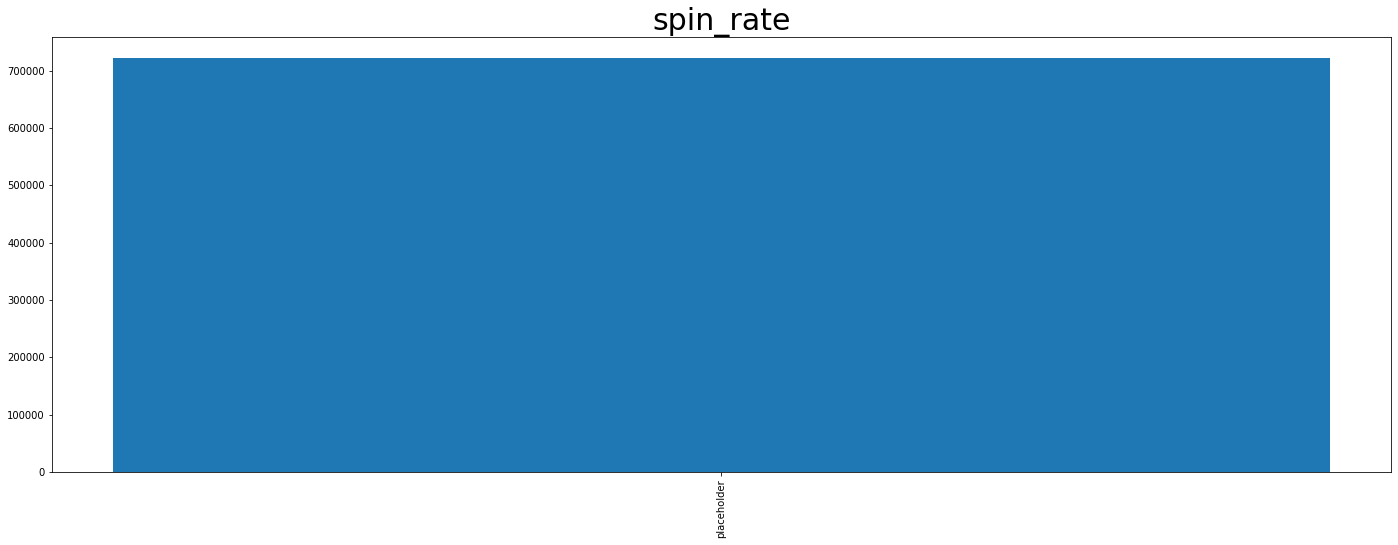

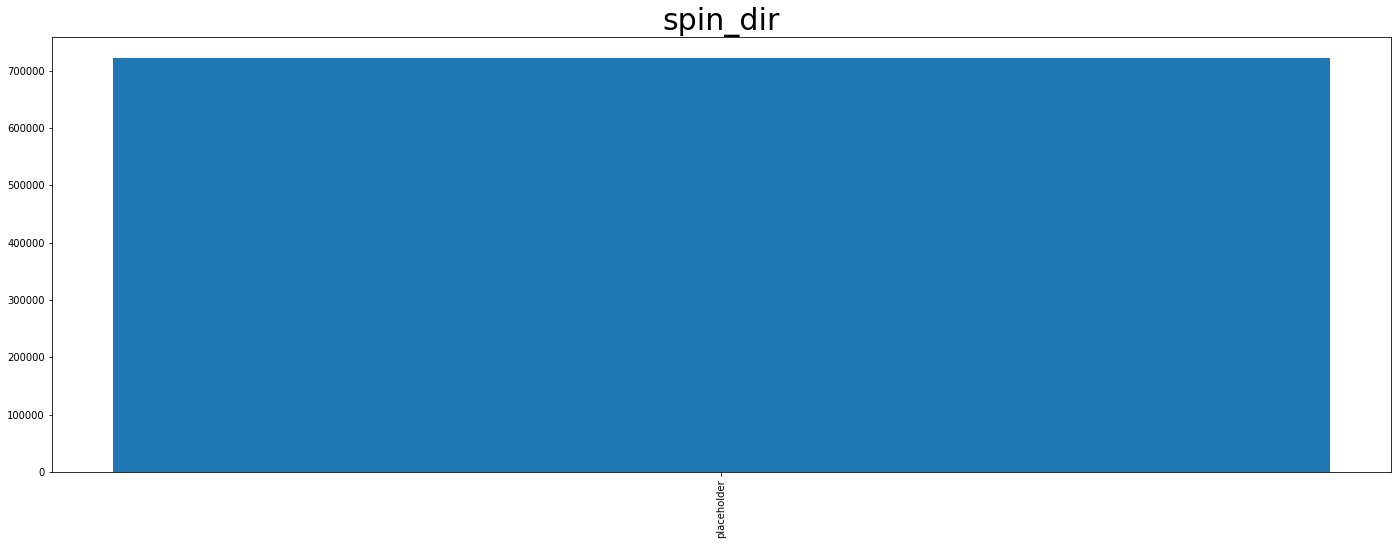

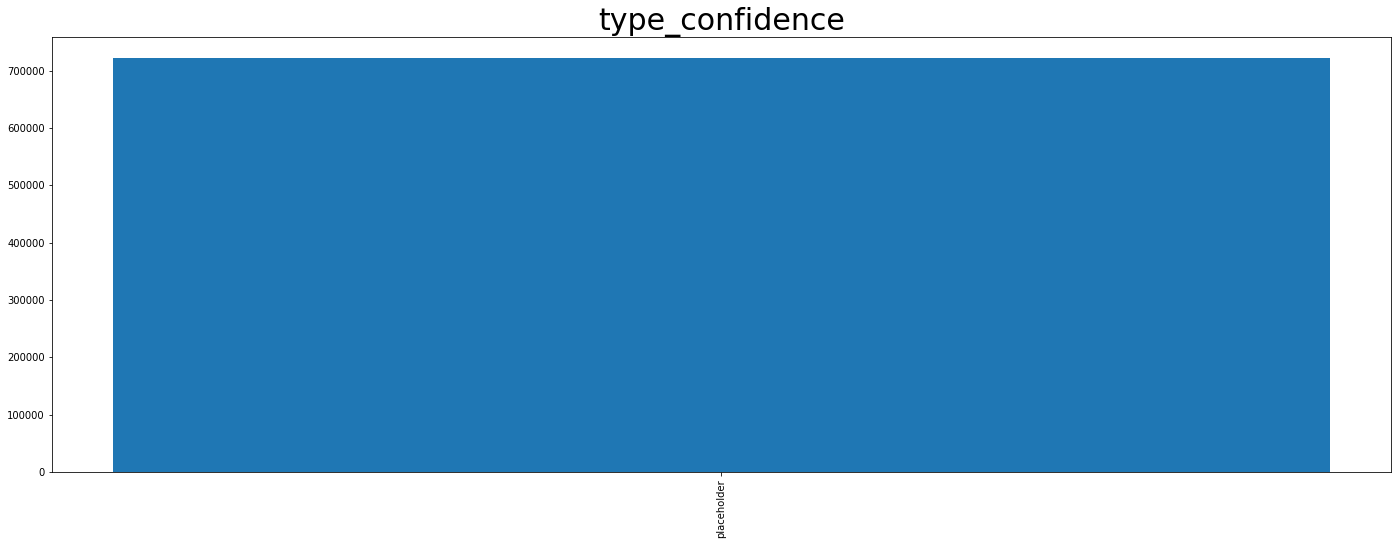

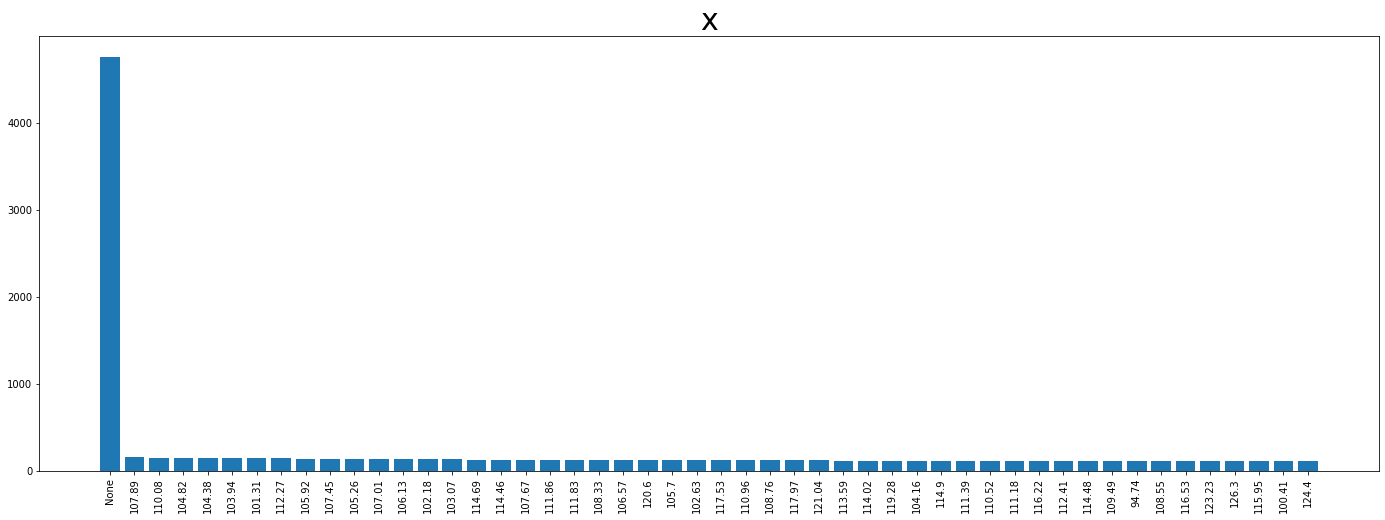

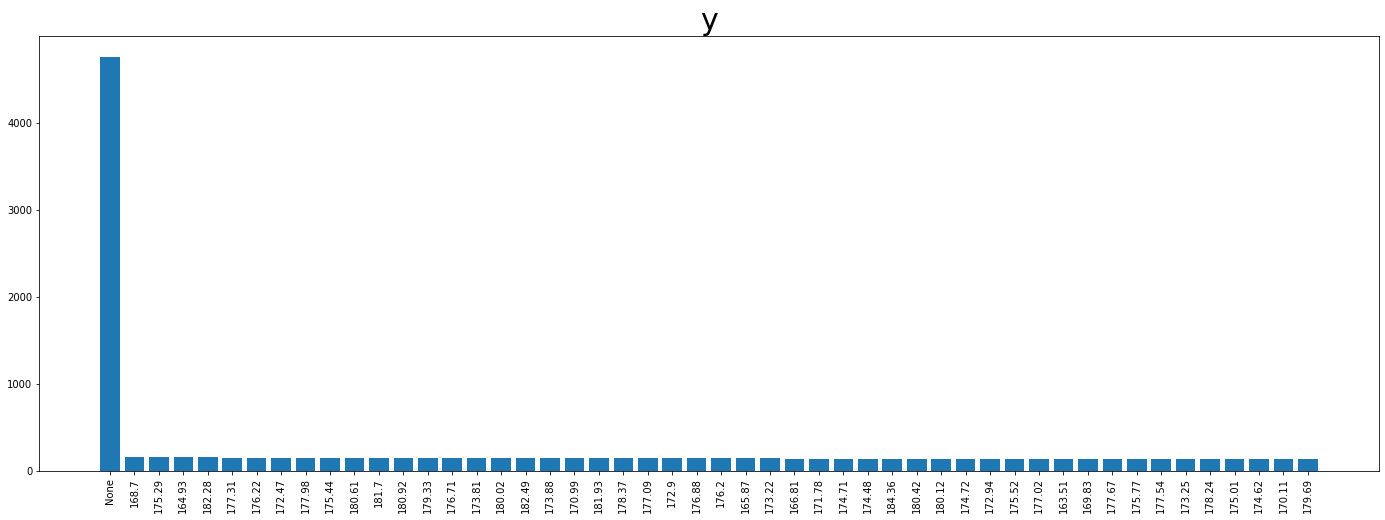

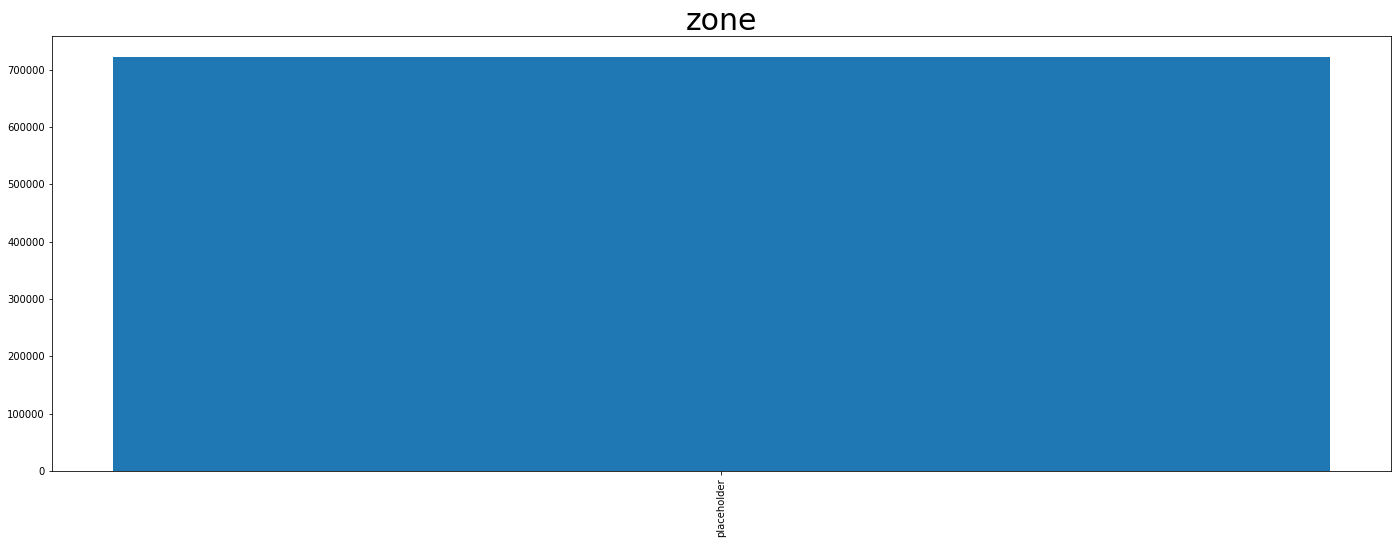

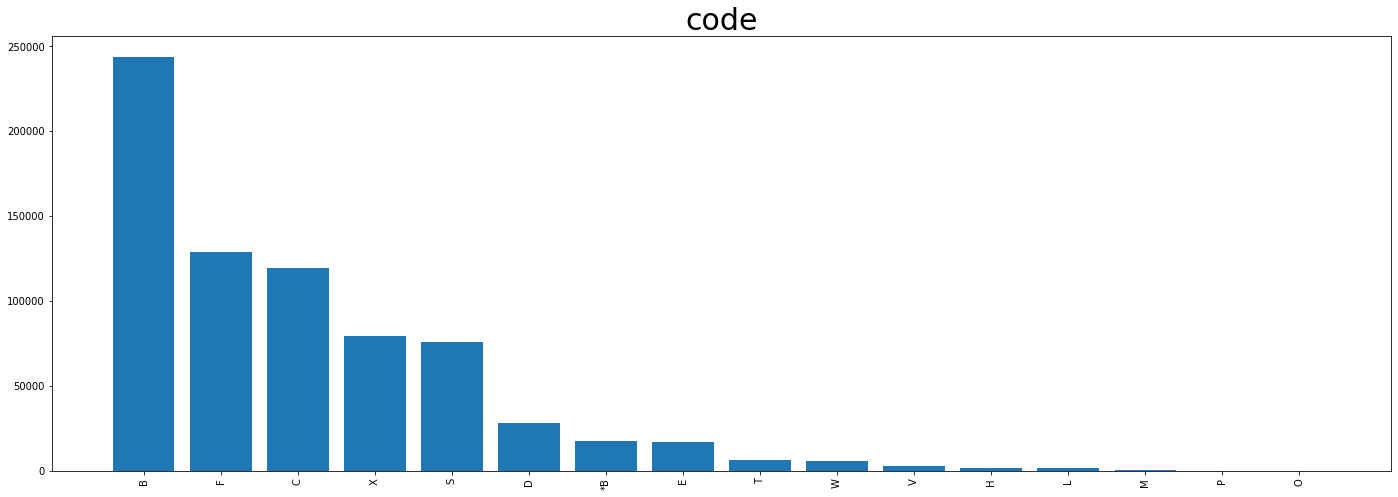

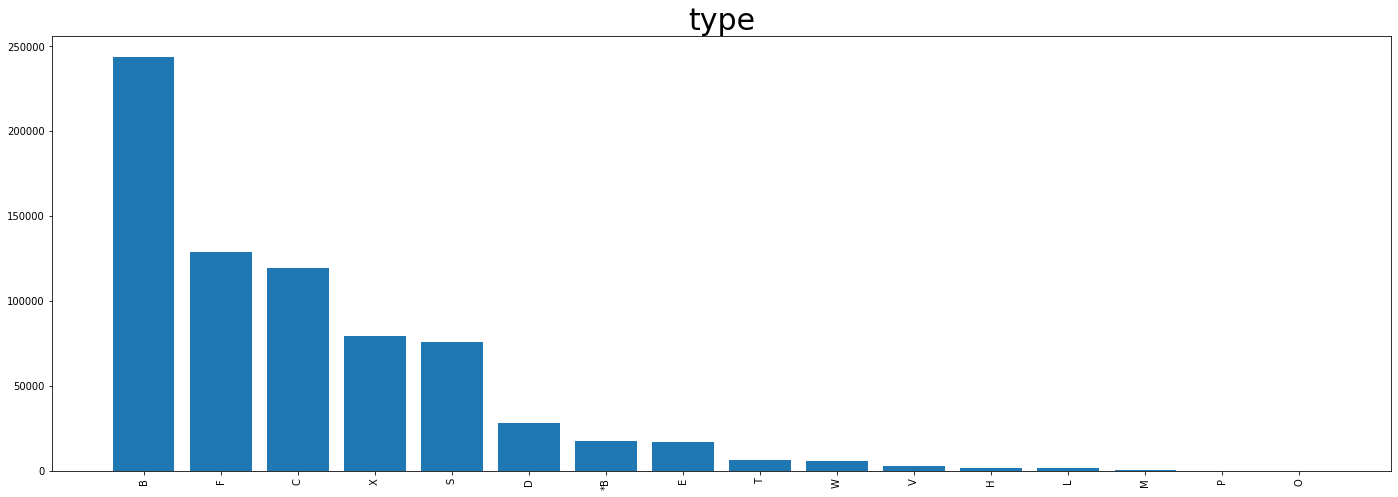

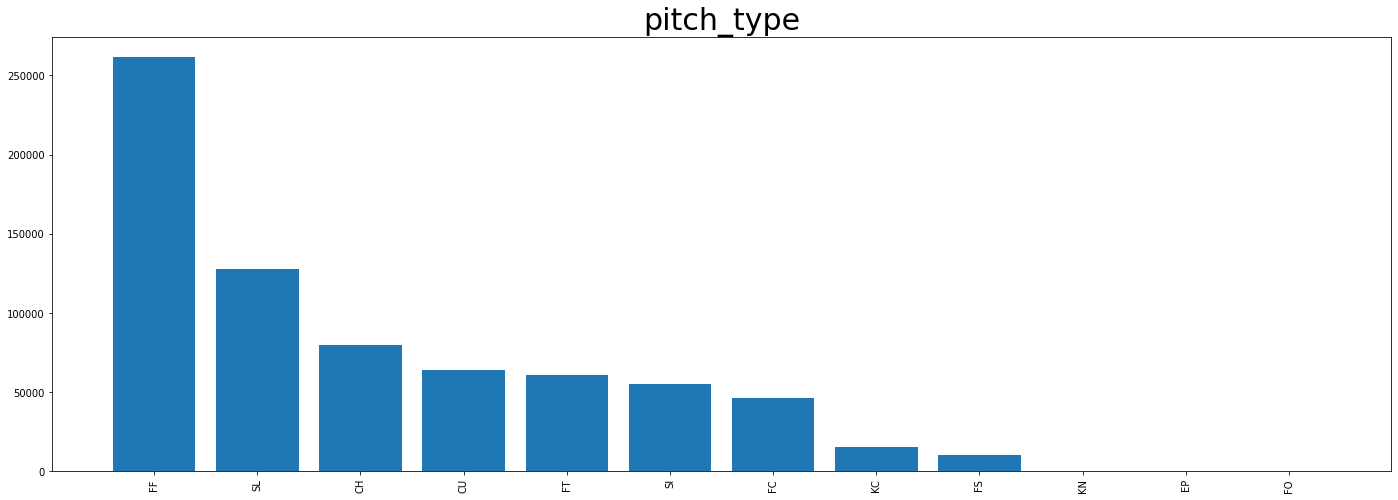

descriptive statistics (px):
Min: -5.0300	Q1(25%): -0.5500 	Q2(50%): 0.0400 	Q3(75%): 0.6200 	Max: 6.2900
Missing: 6629

descriptive statistics (pz):
Min: -4.1300	Q1(25%): 1.6300 	Q2(50%): 2.2500 	Q3(75%): 2.8700 	Max: 12.2100
Missing: 6629

descriptive statistics (start_speed):
Min: 50.6000	Q1(25%): 84.5000 	Q2(50%): 89.8000 	Q3(75%): 93.4000 	Max: 104.3000
Missing: 6629

descriptive statistics (end_speed):
Min: 46.5000	Q1(25%): 78.1000 	Q2(50%): 82.8000 	Q3(75%): 85.8000 	Max: 96.0000
Missing: 6629



D:\environment\anaconda\anaconda\envs\sjwj\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<class 'pandas.core.frame.DataFrame'>
Float64Index: 728790 entries, 0.0 to 0.0
Data columns (total 39 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   px               722161 non-null  float64
 1   pz               722161 non-null  float64
 2   start_speed      722161 non-null  float64
 3   end_speed        722161 non-null  float64
 4   spin_rate        722161 non-null  object 
 5   spin_dir         722161 non-null  object 
 6   break_angle      722161 non-null  float64
 7   break_length     722161 non-null  float64
 8   break_y          722161 non-null  float64
 9   ax               722161 non-null  float64
 10  ay               722161 non-null  float64
 11  az               722161 non-null  float64
 12  sz_bot           728790 non-null  float64
 13  sz_top           728790 non-null  float64
 14  type_confidence  722161 non-null  object 
 15  vx0              722161 non-null  float64
 16  vy0              722161 non-null  flo

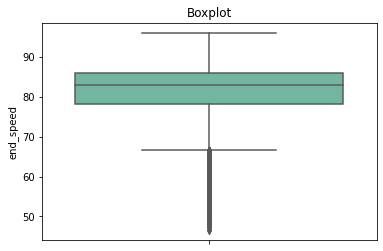

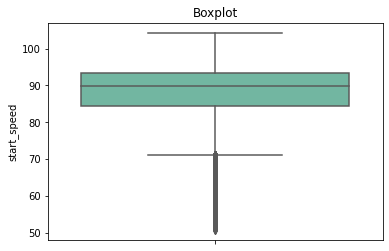

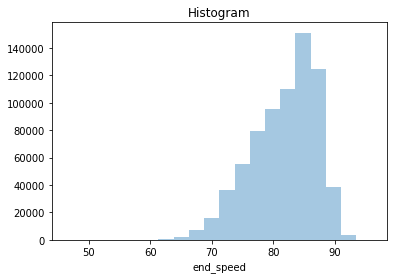

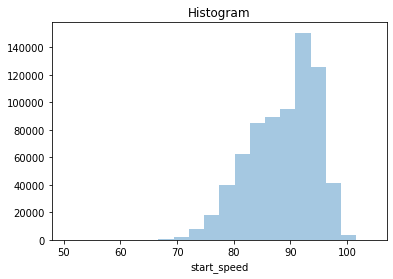

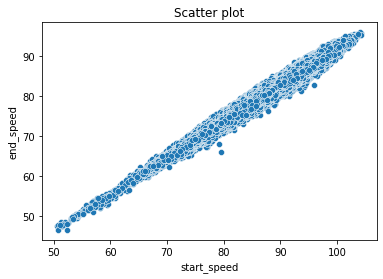

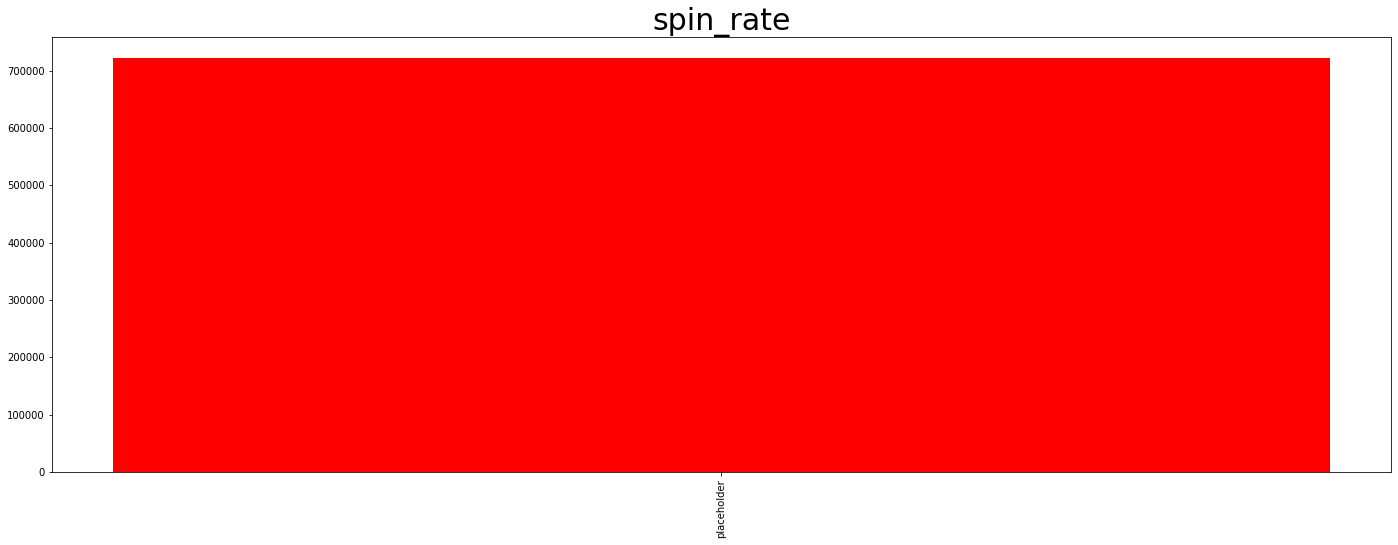

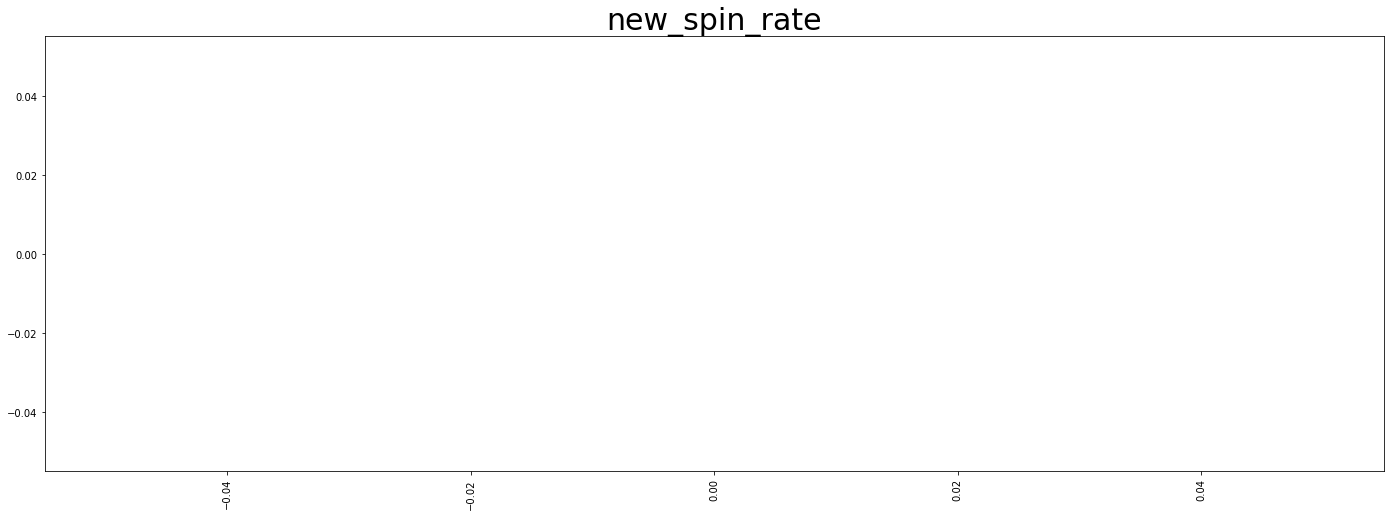

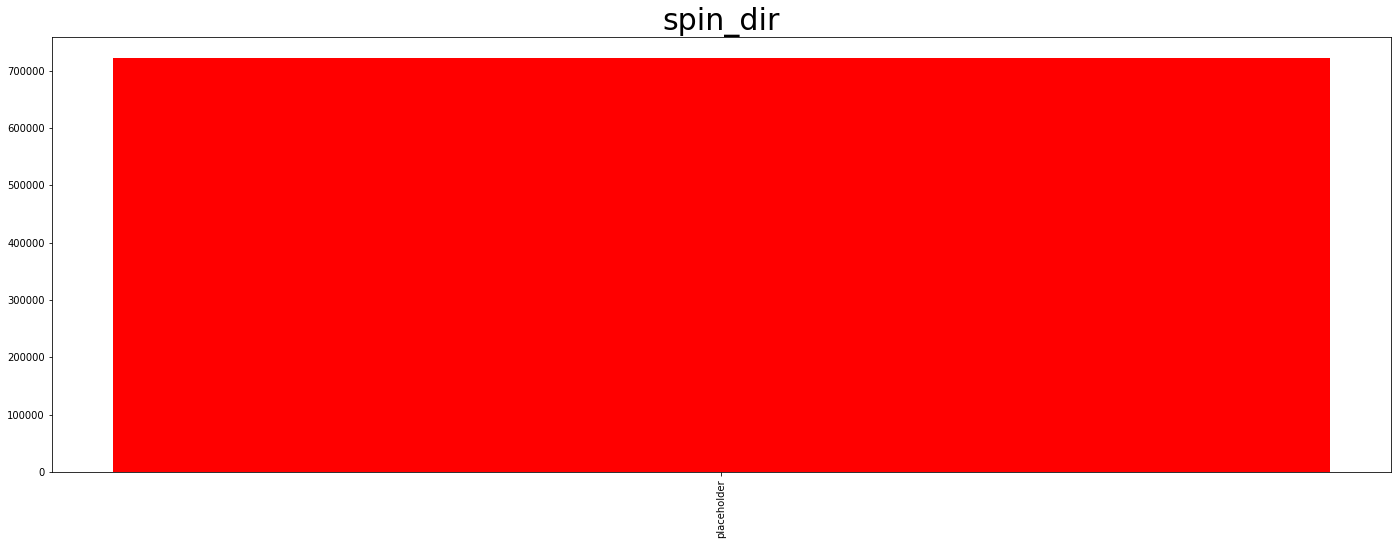

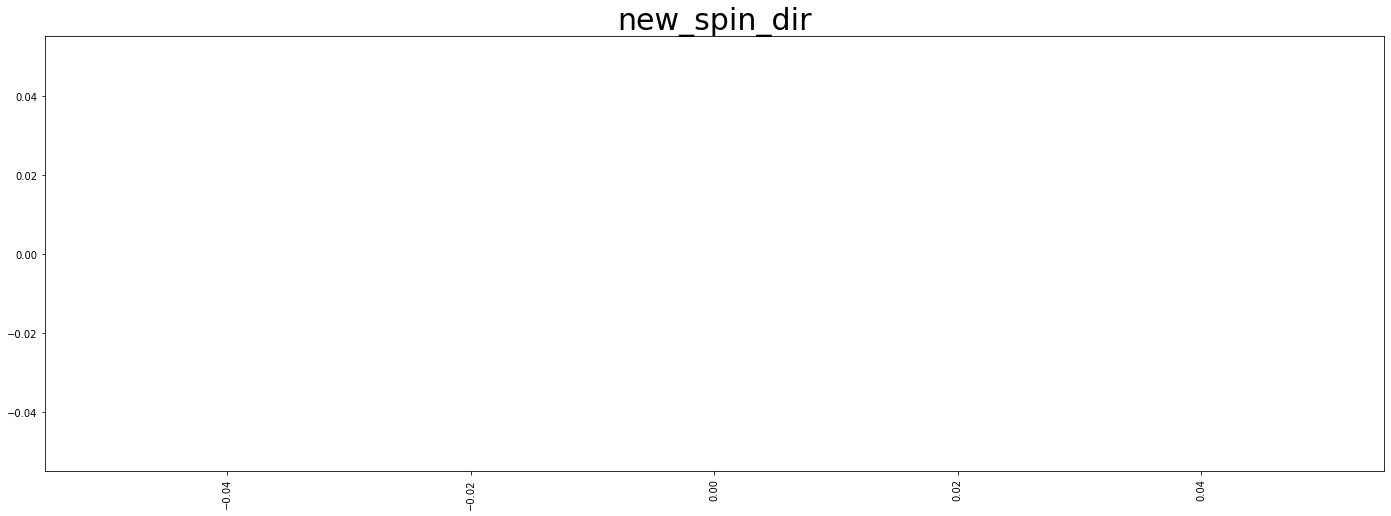

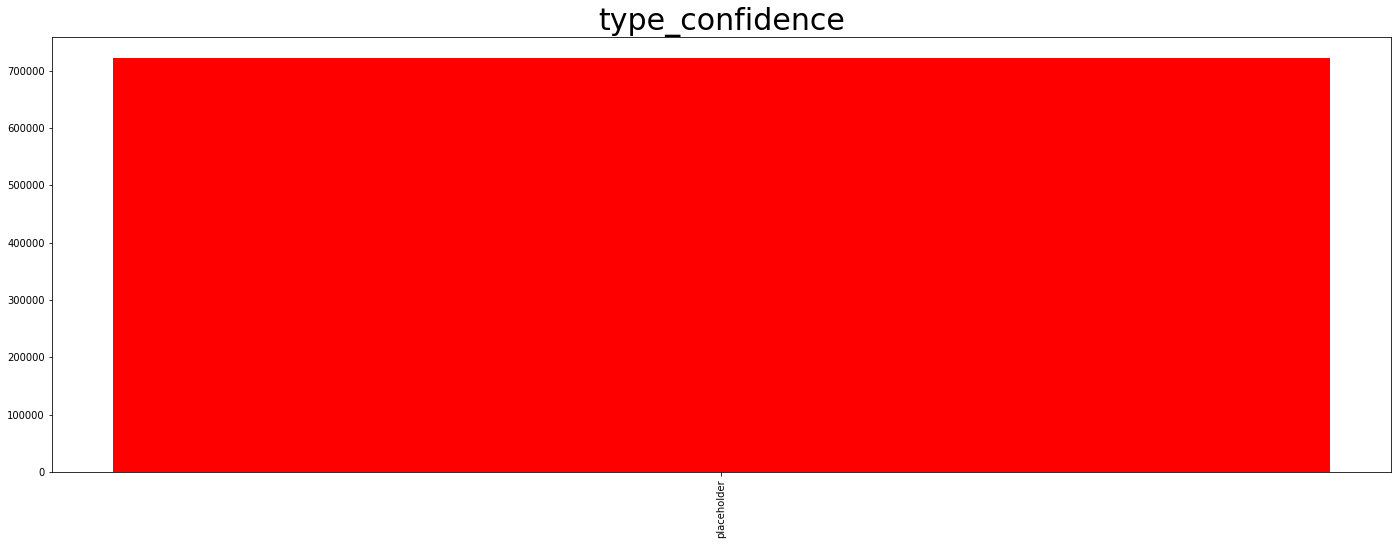

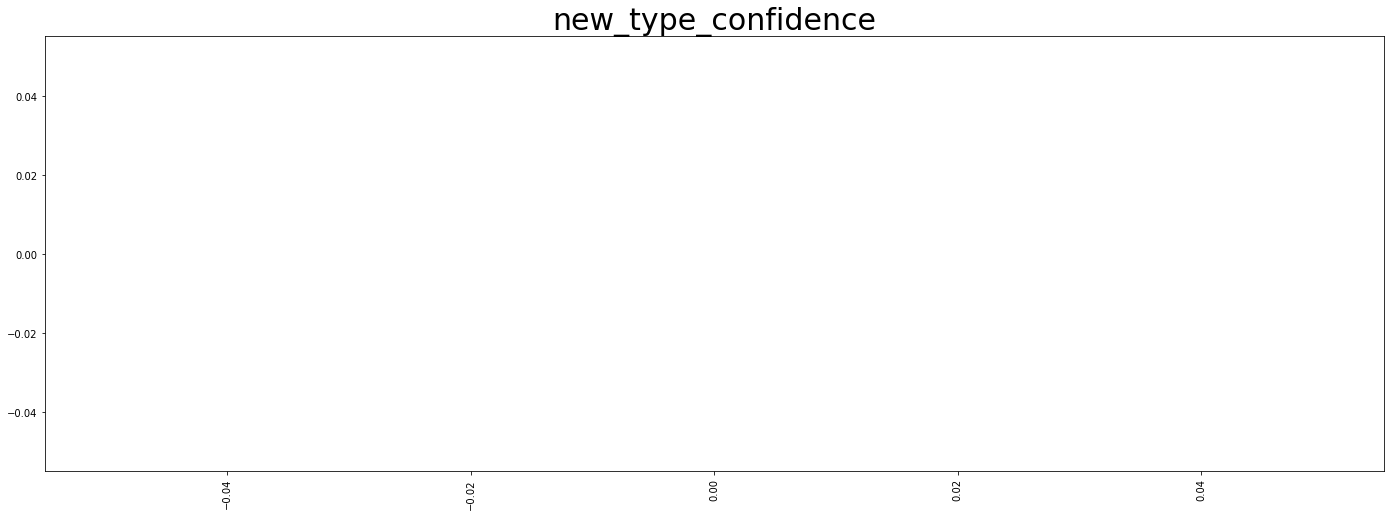

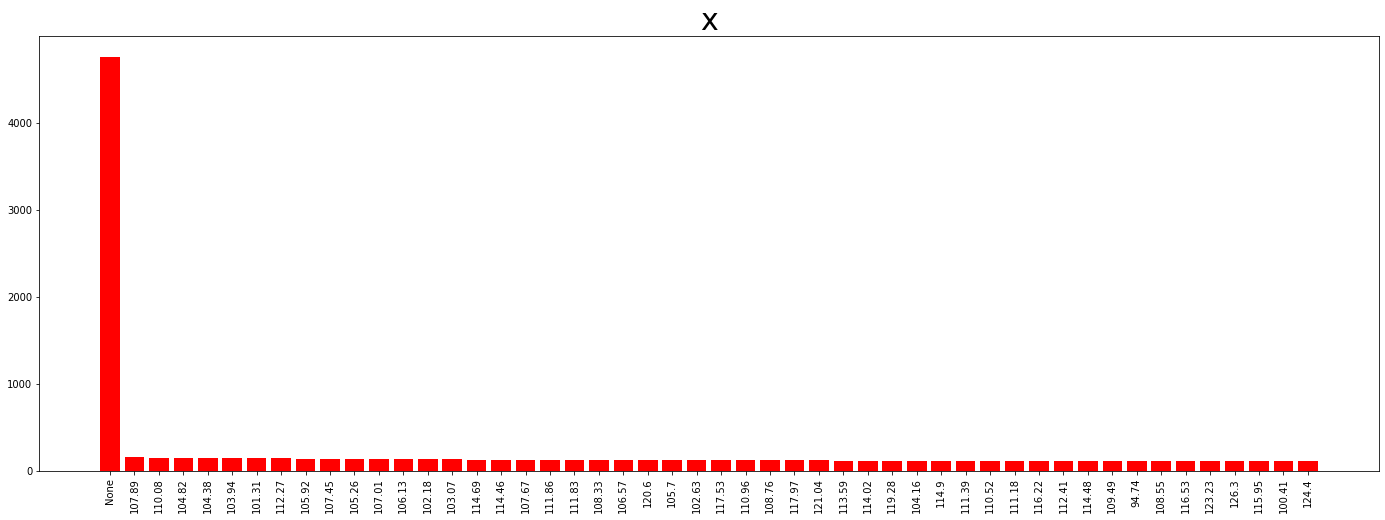

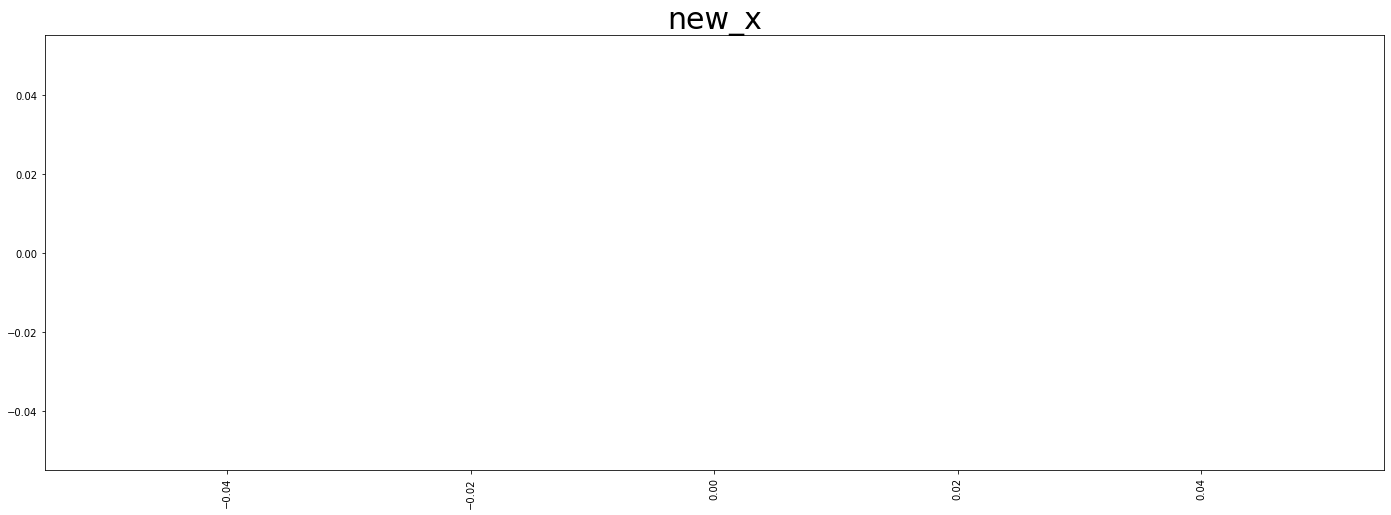

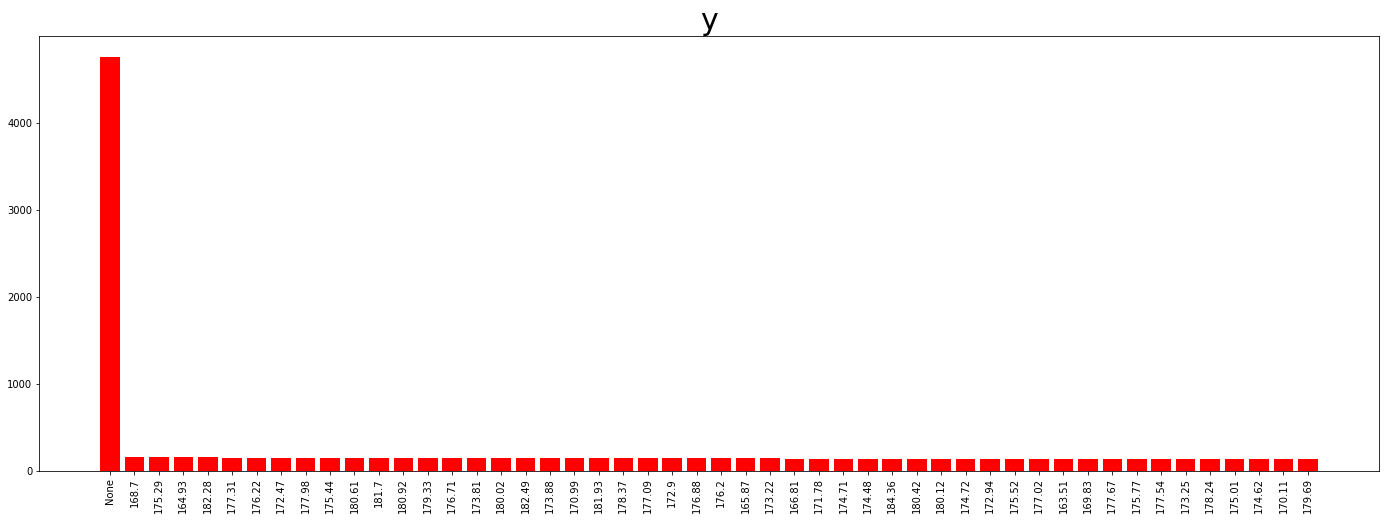

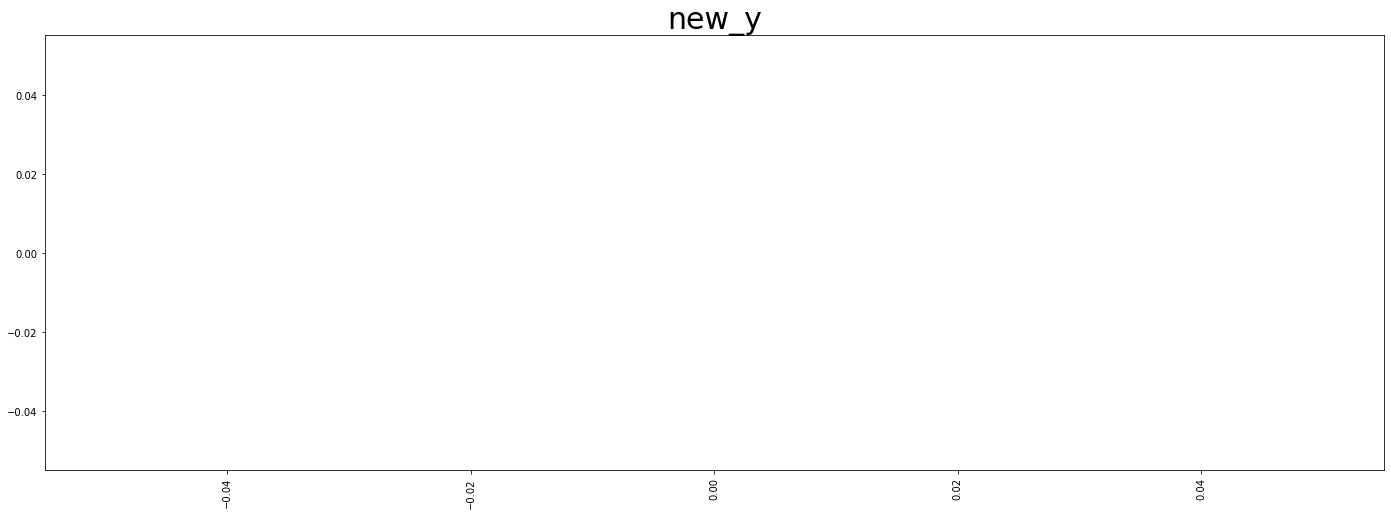

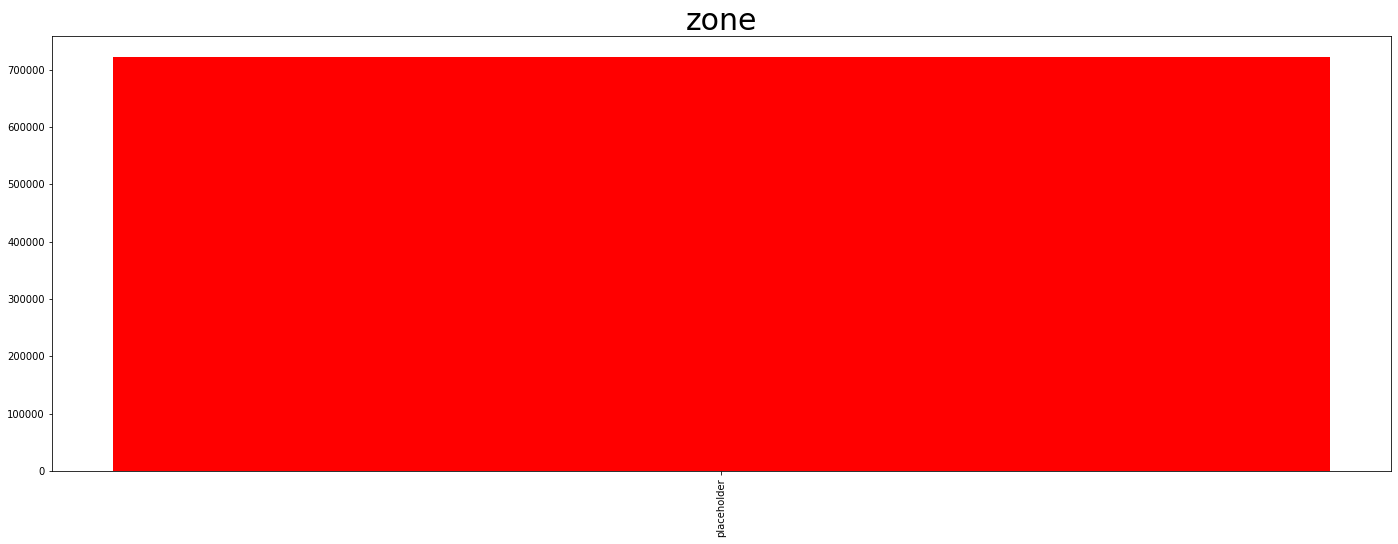

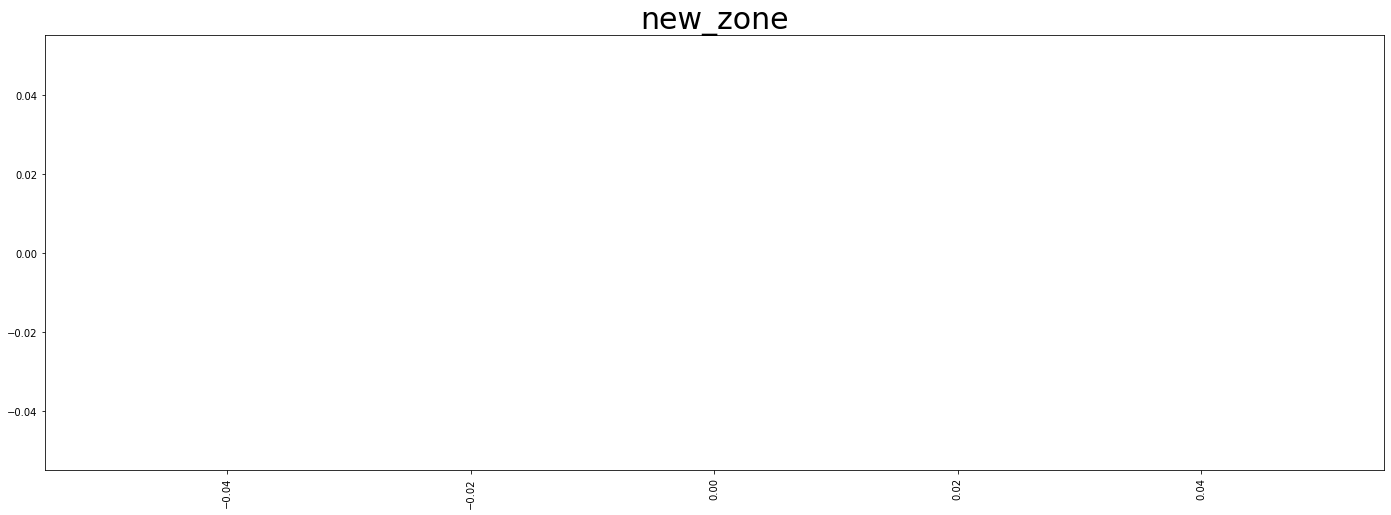

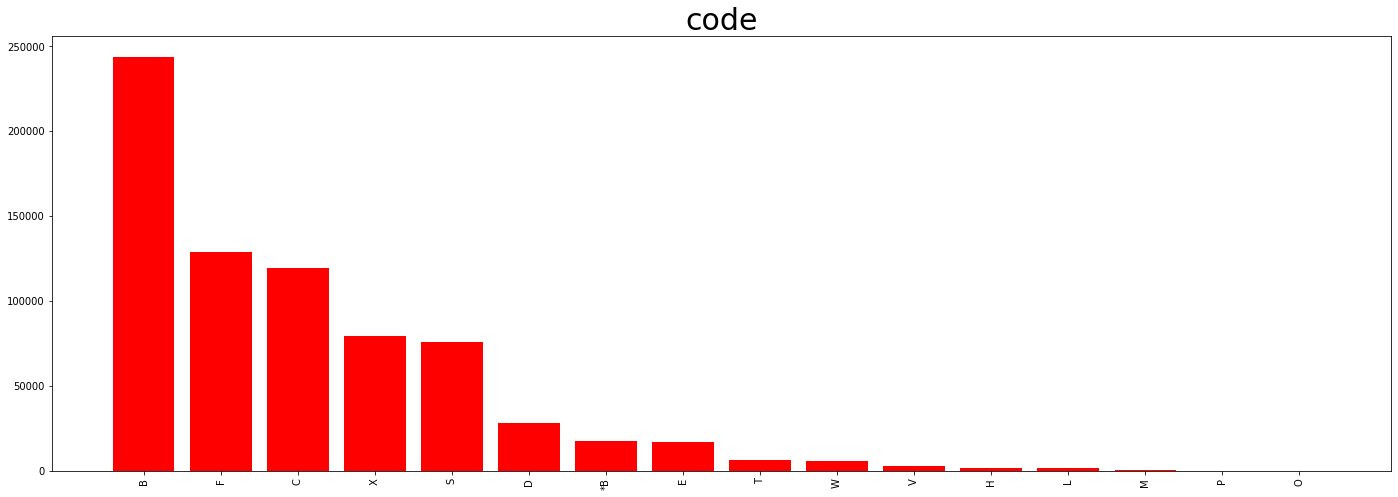

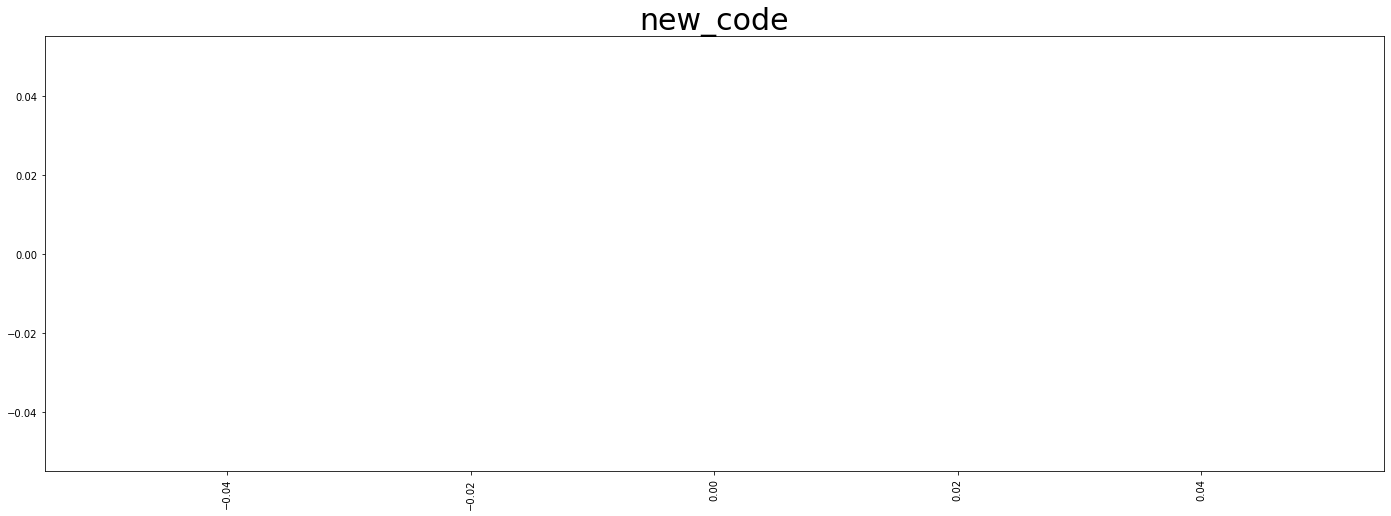

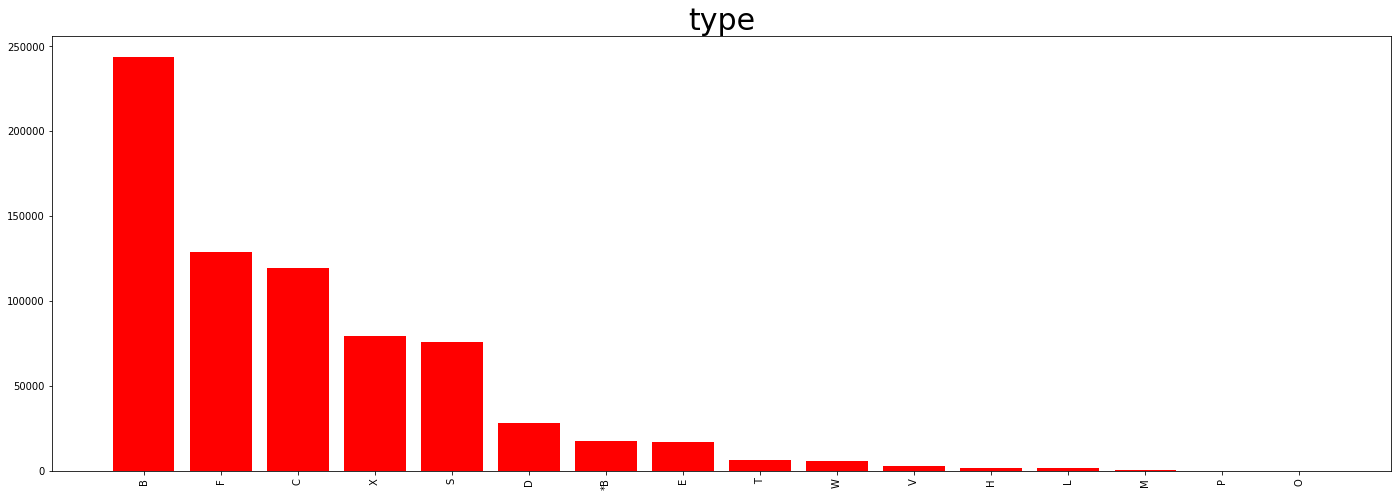

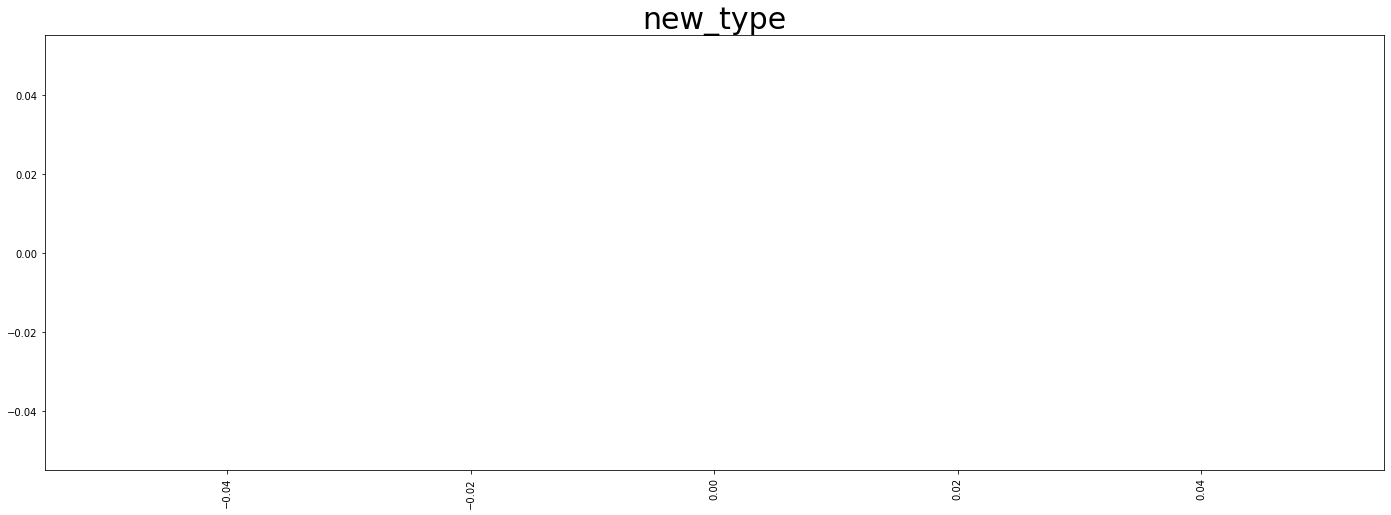

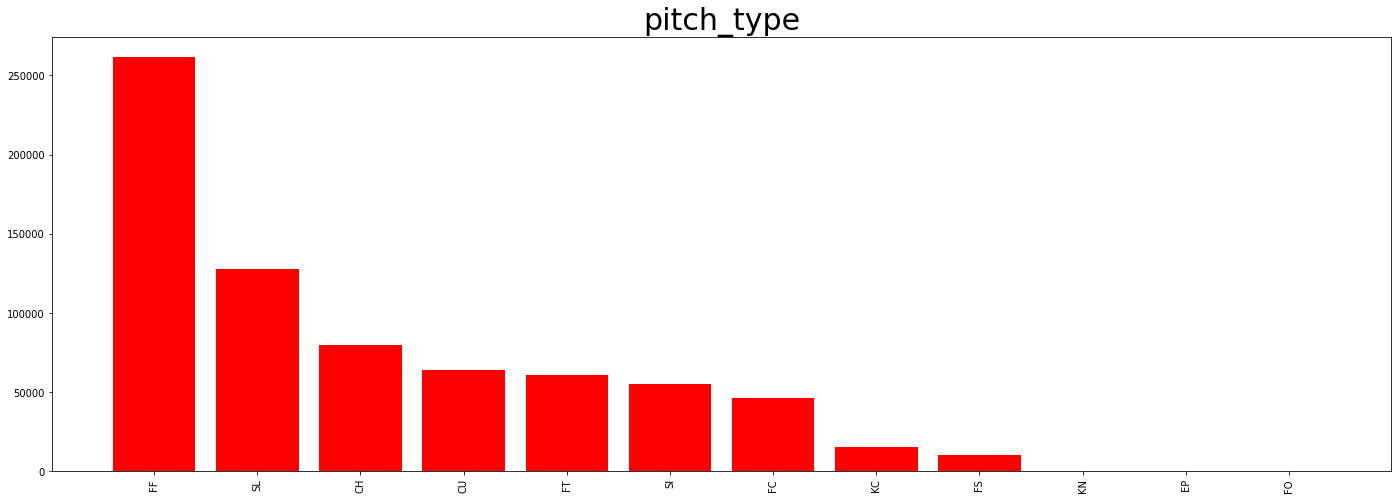

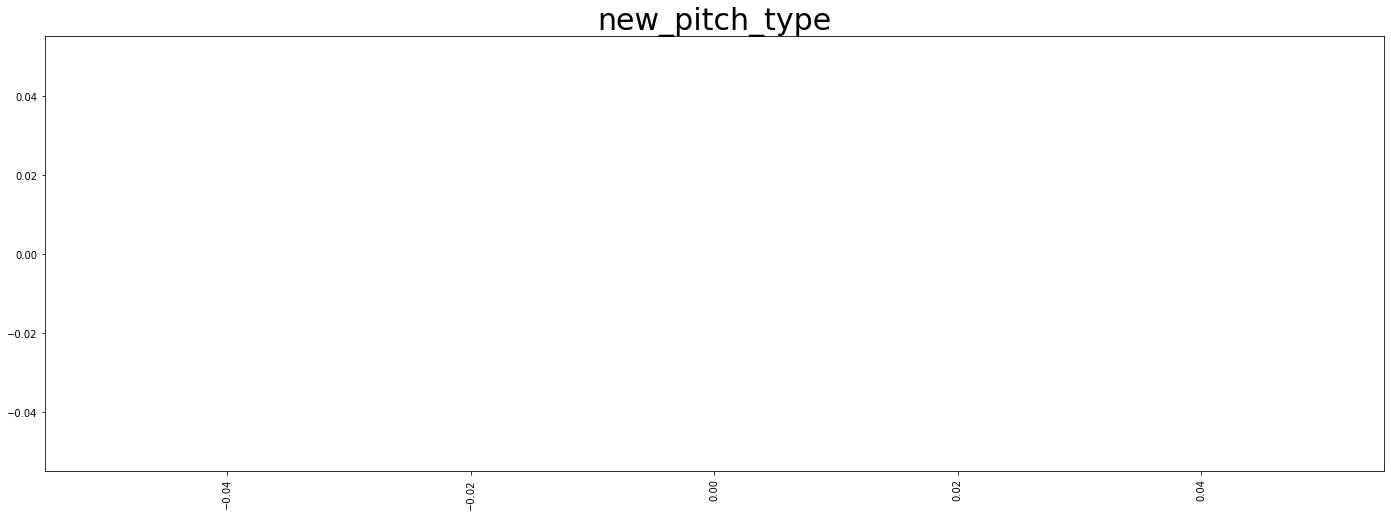

descriptive statistics (px):
Min: -5.0300	Q1(25%): -0.5500 	Q2(50%): 0.0400 	Q3(75%): 0.6200 	Max: 6.2900
Missing: 6629

 new Min: nan	Q1(25%): nan 	Q2(50%): nan 	Q3(75%): nan 	Max: nan 
 new Missing: 728790 

descriptive statistics (pz):
Min: -4.1300	Q1(25%): 1.6300 	Q2(50%): 2.2500 	Q3(75%): 2.8700 	Max: 12.2100
Missing: 6629

 new Min: nan	Q1(25%): nan 	Q2(50%): nan 	Q3(75%): nan 	Max: nan 
 new Missing: 728790 

descriptive statistics (start_speed):
Min: 50.6000	Q1(25%): 84.5000 	Q2(50%): 89.8000 	Q3(75%): 93.4000 	Max: 104.3000
Missing: 6629

 new Min: nan	Q1(25%): nan 	Q2(50%): nan 	Q3(75%): nan 	Max: nan 
 new Missing: 728790 

descriptive statistics (end_speed):
Min: 46.5000	Q1(25%): 78.1000 	Q2(50%): 82.8000 	Q3(75%): 85.8000 	Max: 96.0000
Missing: 6629

 new Min: nan	Q1(25%): nan 	Q2(50%): nan 	Q3(75%): nan 	Max: nan 
 new Missing: 728790 



D:\environment\anaconda\anaconda\envs\sjwj\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\environment\anaconda\anaconda\envs\sjwj\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
D:\environment\anaconda\anaconda\envs\sjwj\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<class 'pandas.core.frame.DataFrame'>
Float64Index: 728790 entries, 0.0 to 0.0
Data columns (total 39 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   px               722161 non-null  float64
 1   pz               722161 non-null  float64
 2   start_speed      722161 non-null  float64
 3   end_speed        722161 non-null  float64
 4   spin_rate        722161 non-null  object 
 5   spin_dir         722161 non-null  object 
 6   break_angle      722161 non-null  float64
 7   break_length     722161 non-null  float64
 8   break_y          722161 non-null  float64
 9   ax               722161 non-null  float64
 10  ay               722161 non-null  float64
 11  az               722161 non-null  float64
 12  sz_bot           728790 non-null  float64
 13  sz_top           728790 non-null  float64
 14  type_confidence  722161 non-null  object 
 15  vx0              722161 non-null  float64
 16  vy0              722161 non-null  flo

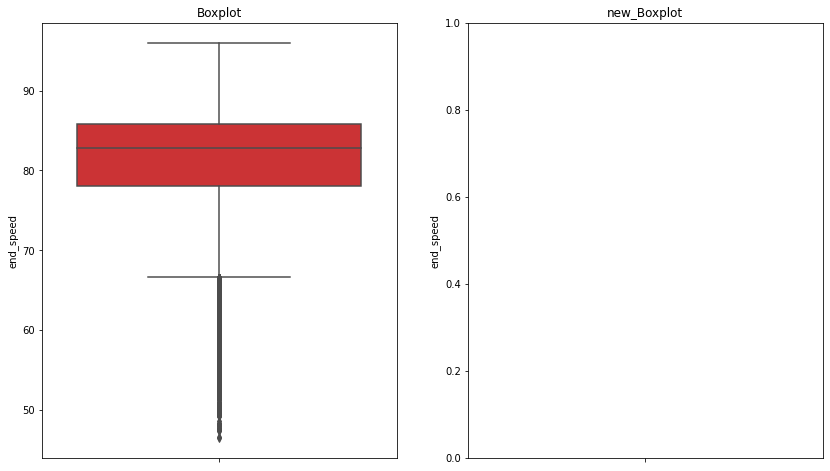

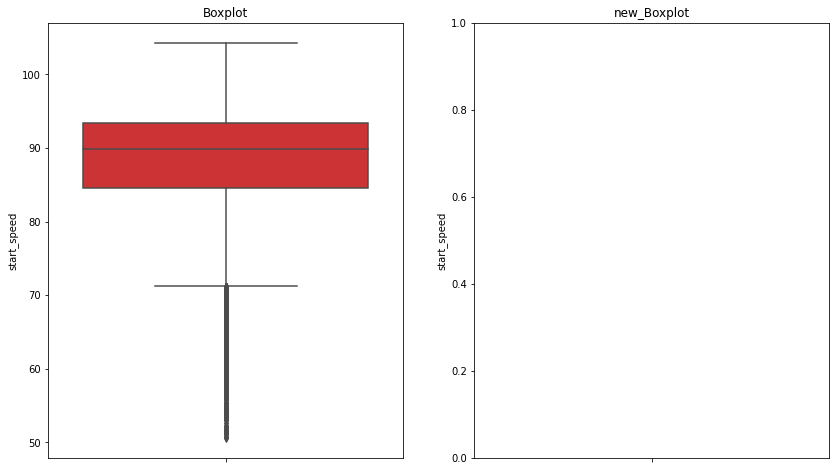

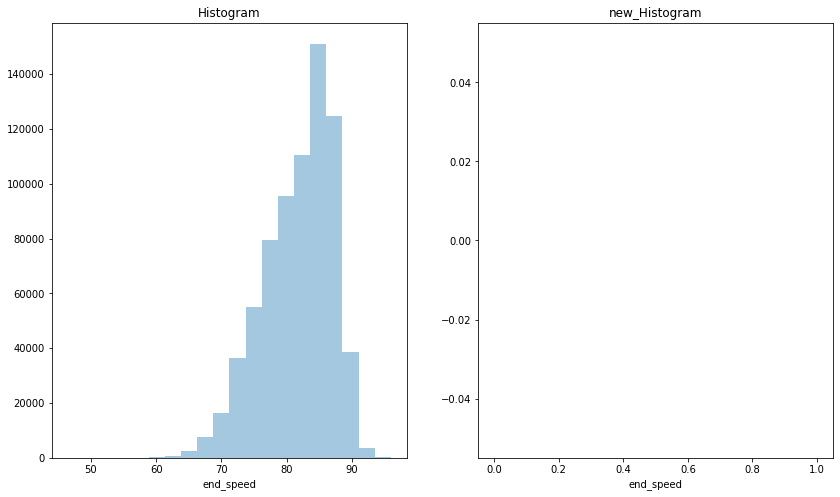

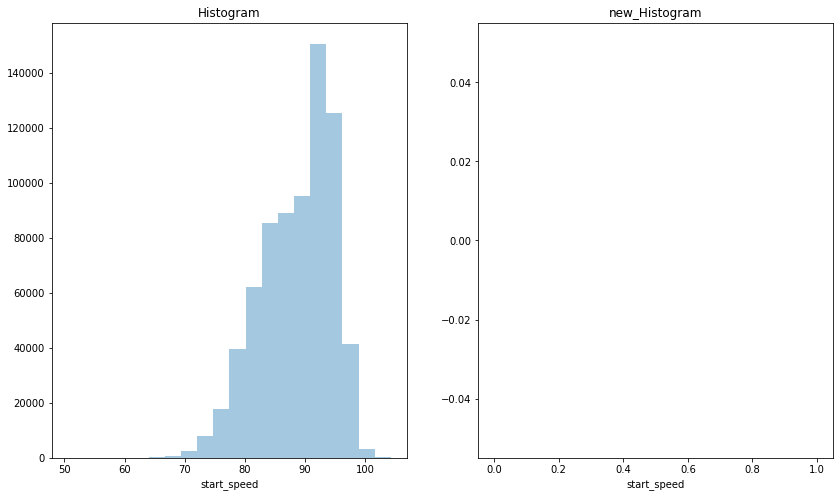

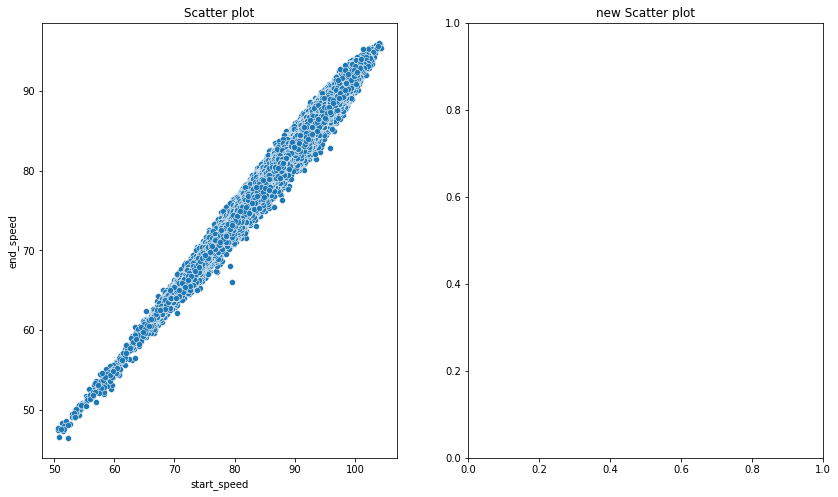

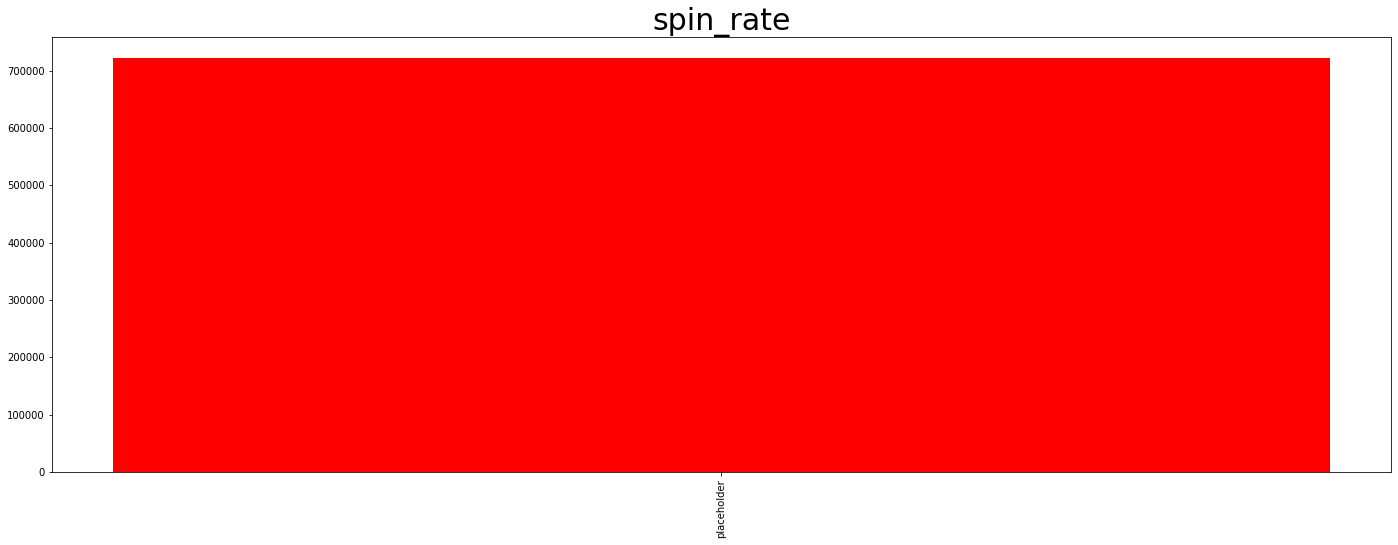

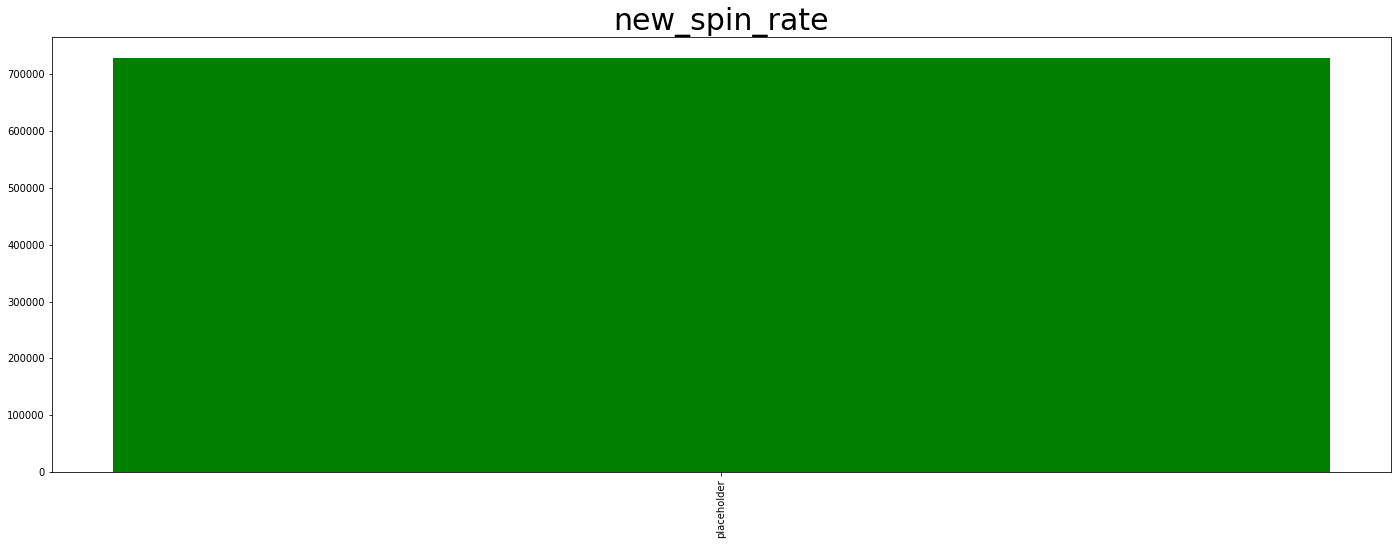

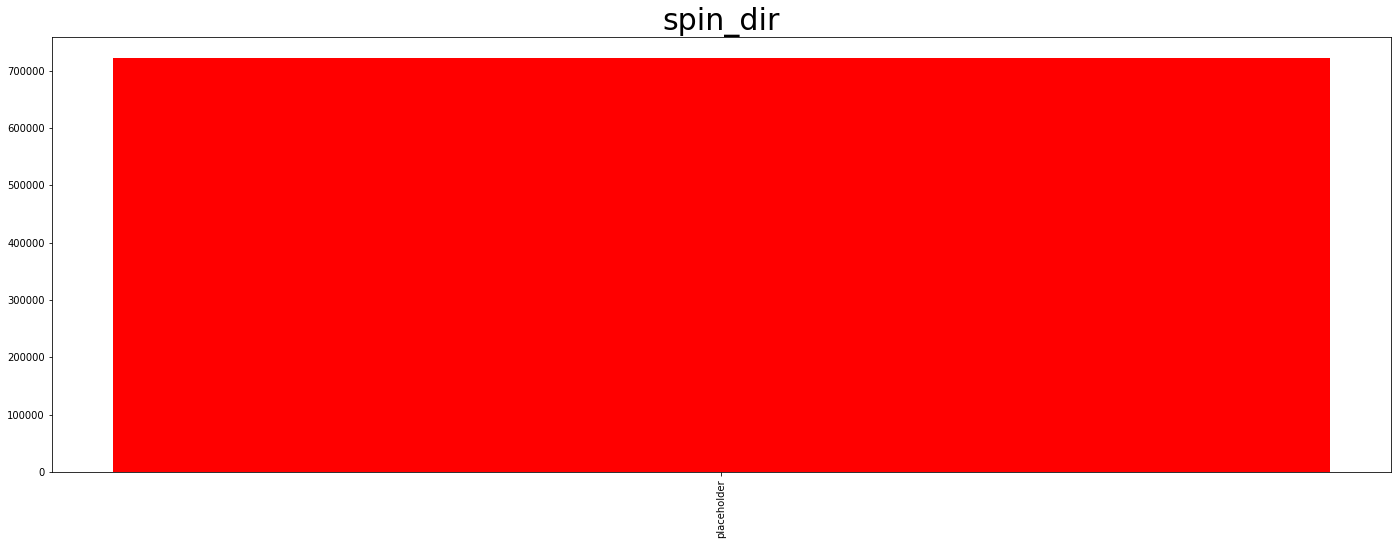

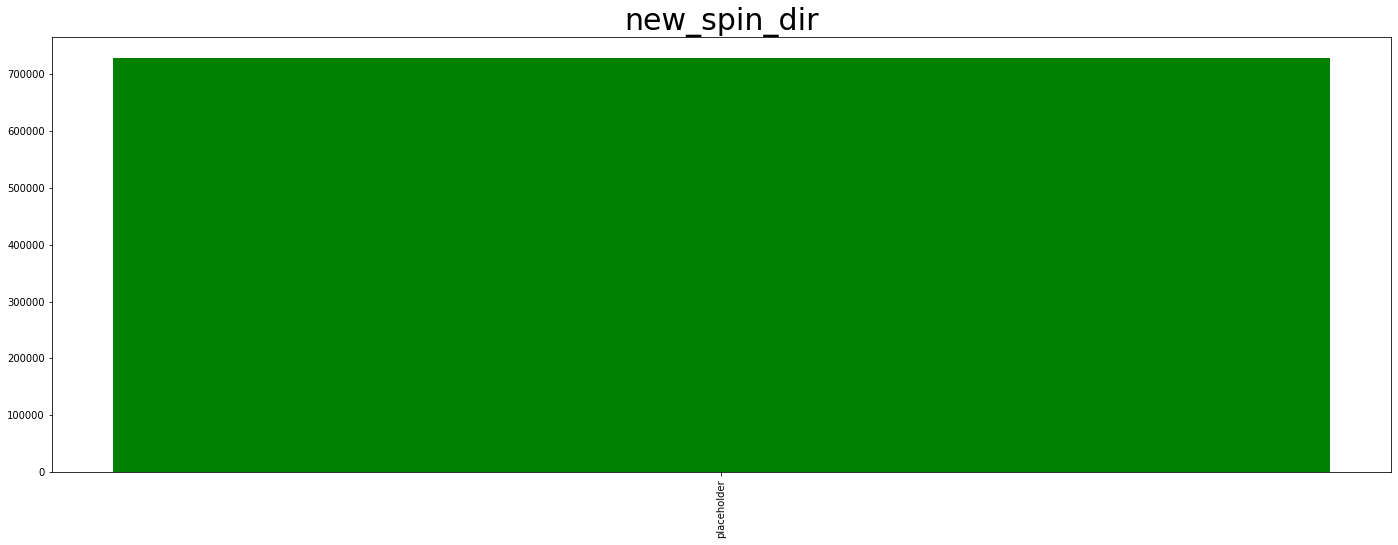

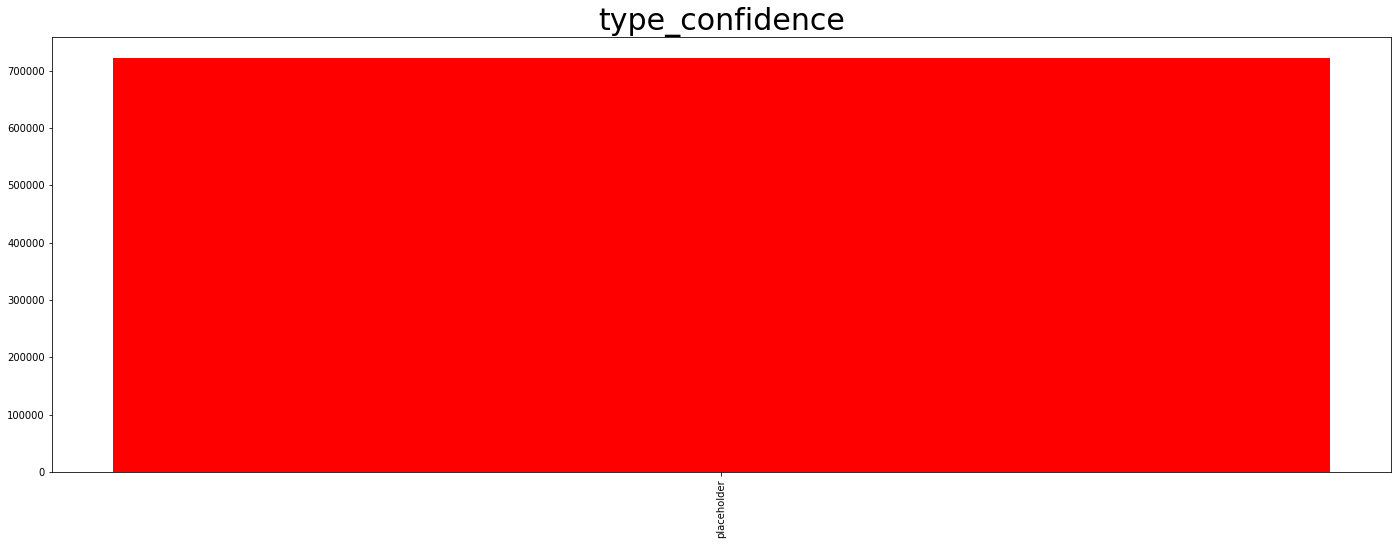

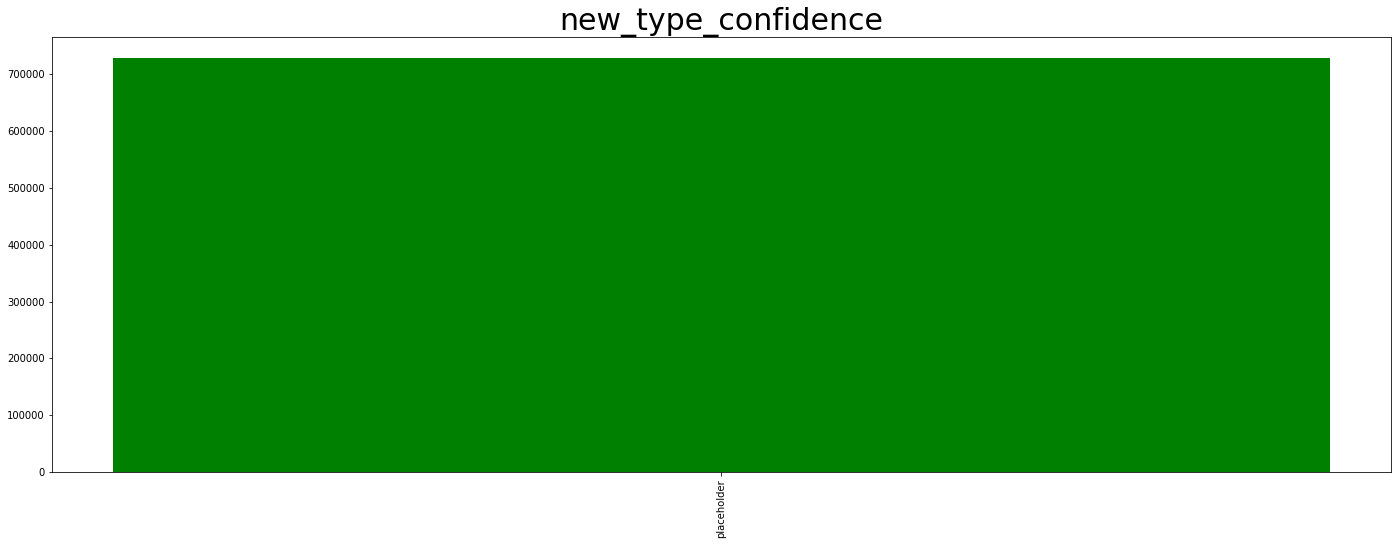

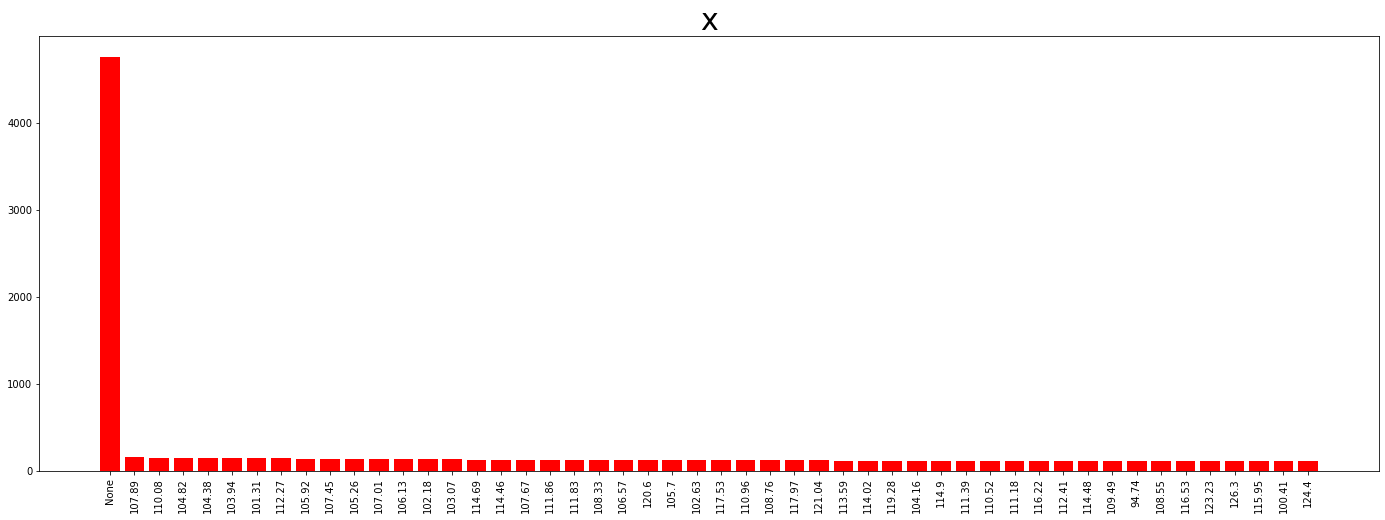

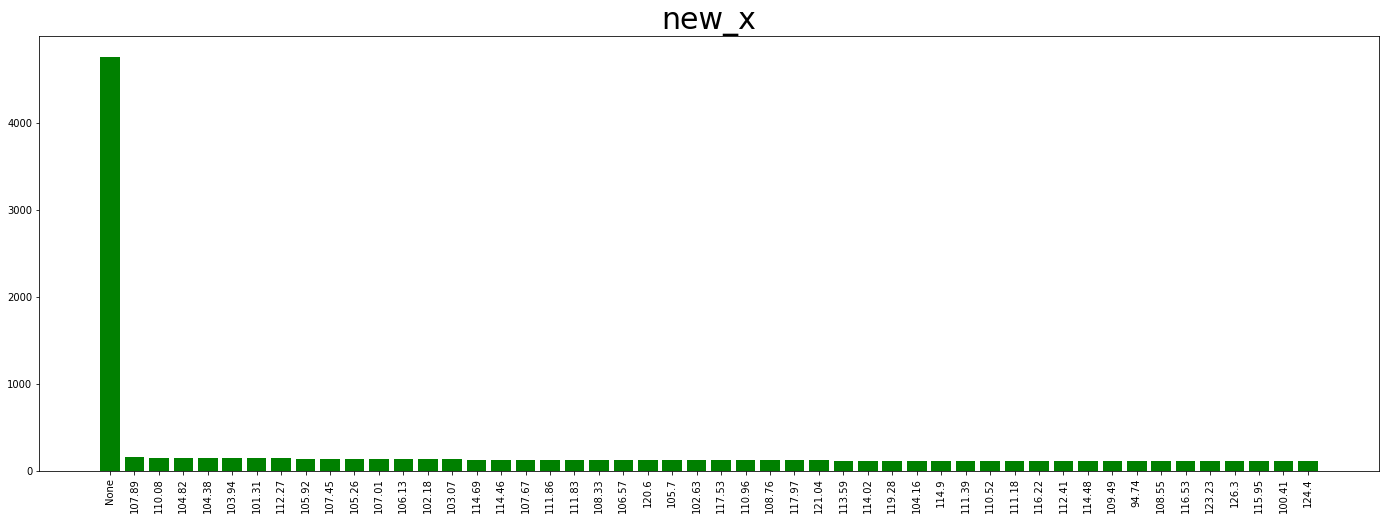

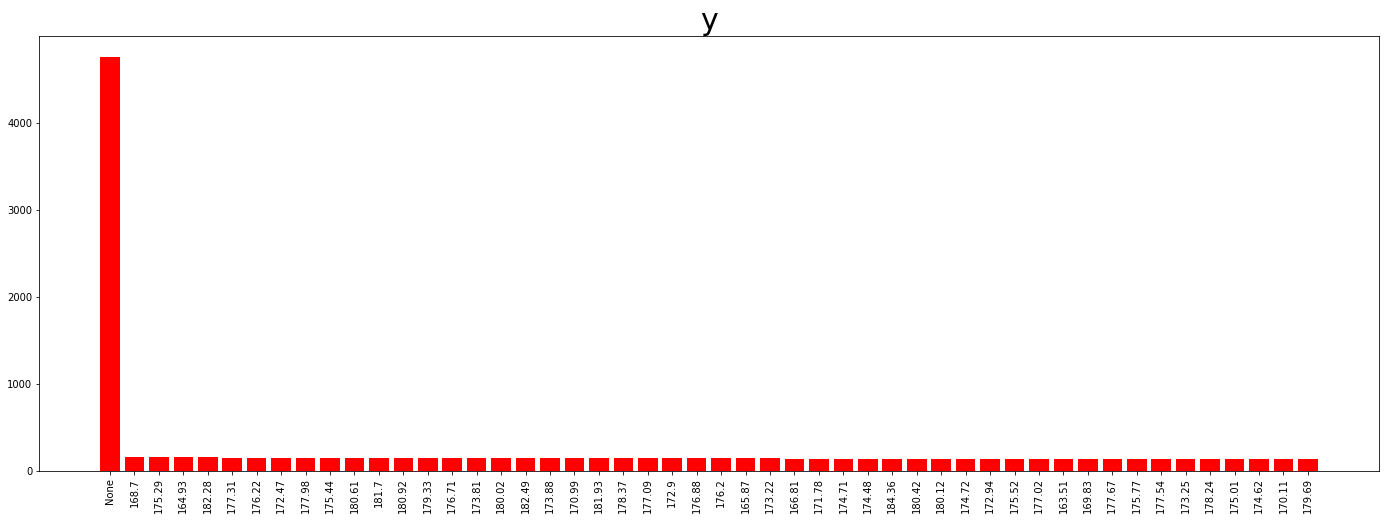

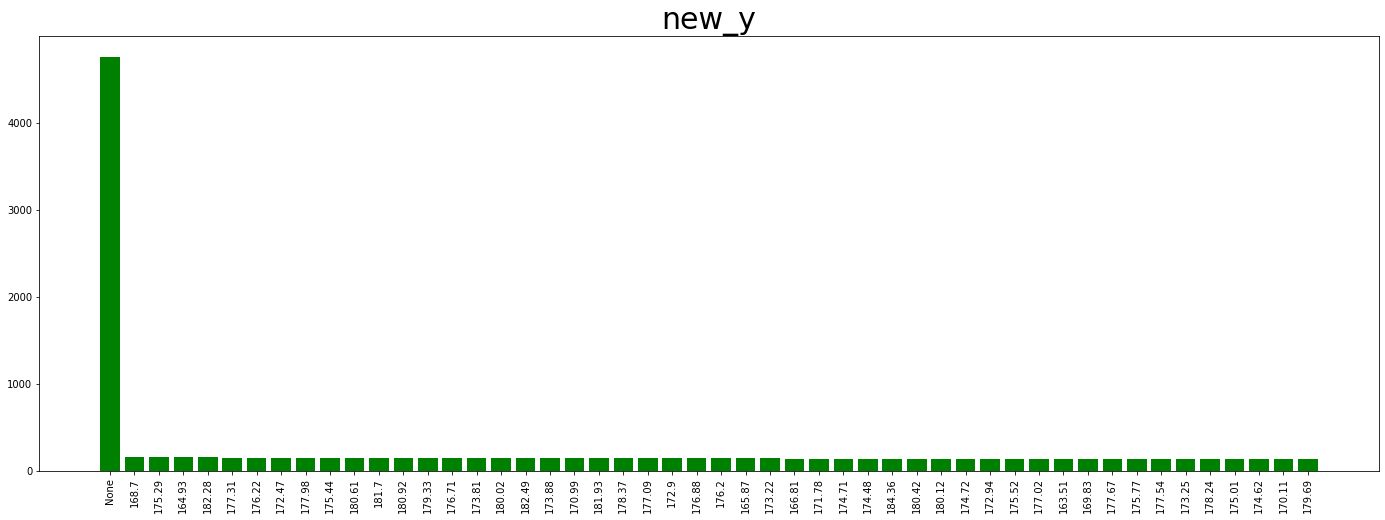

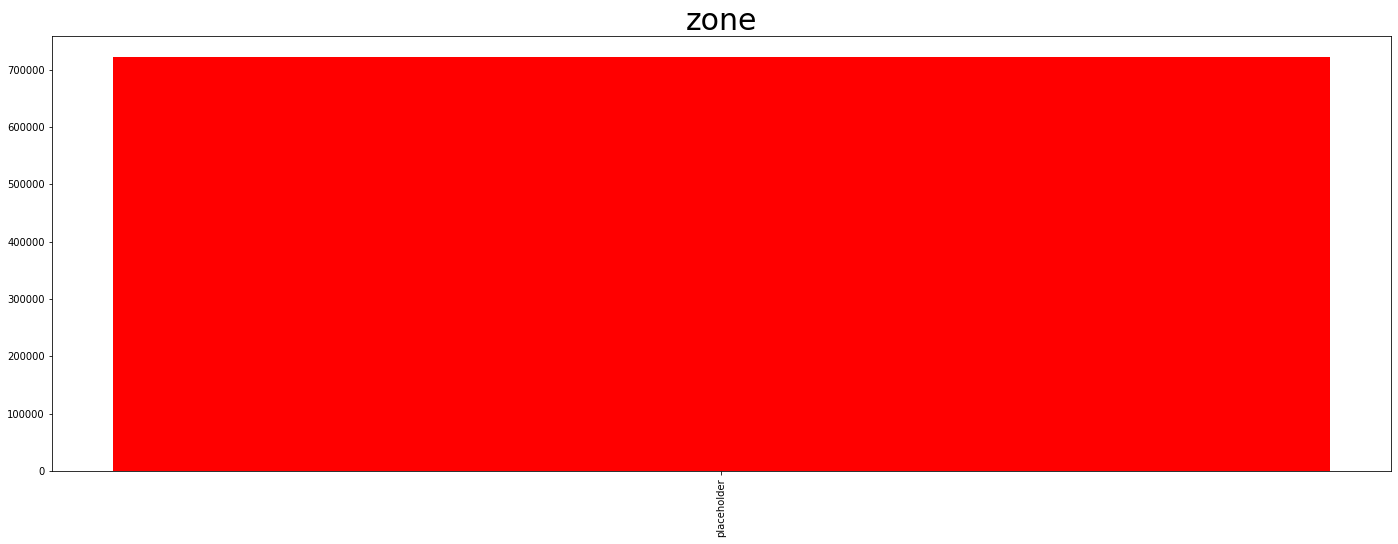

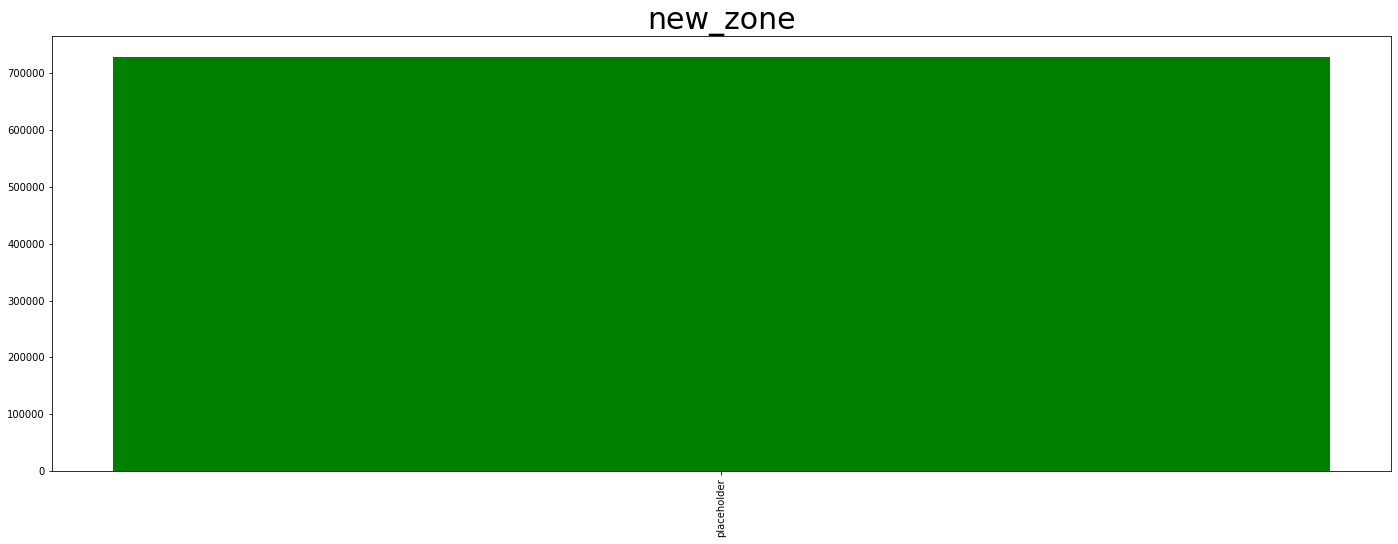

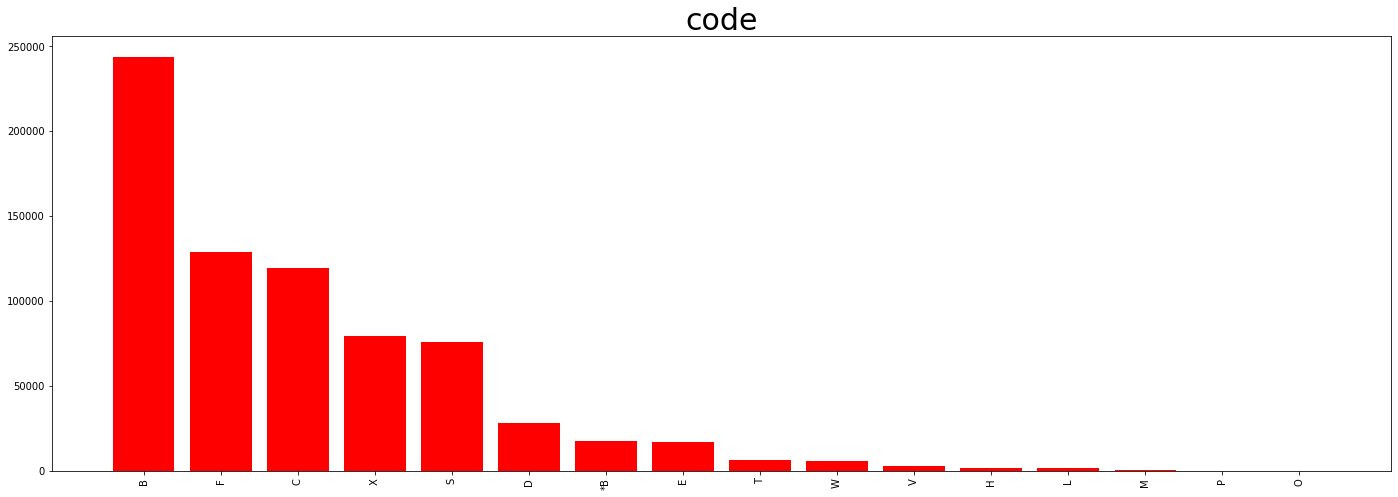

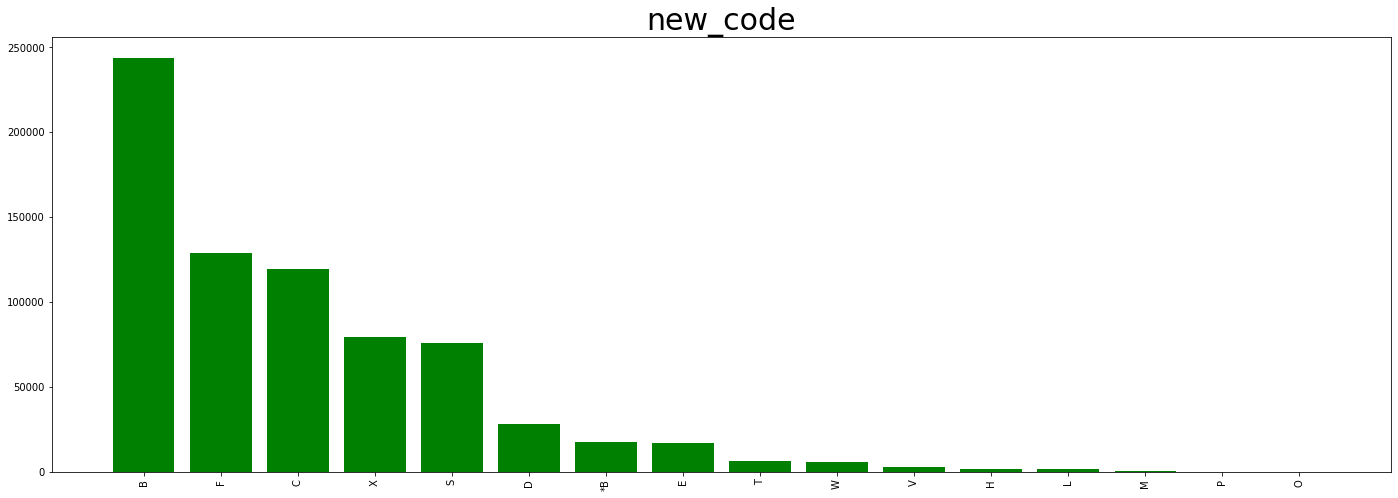

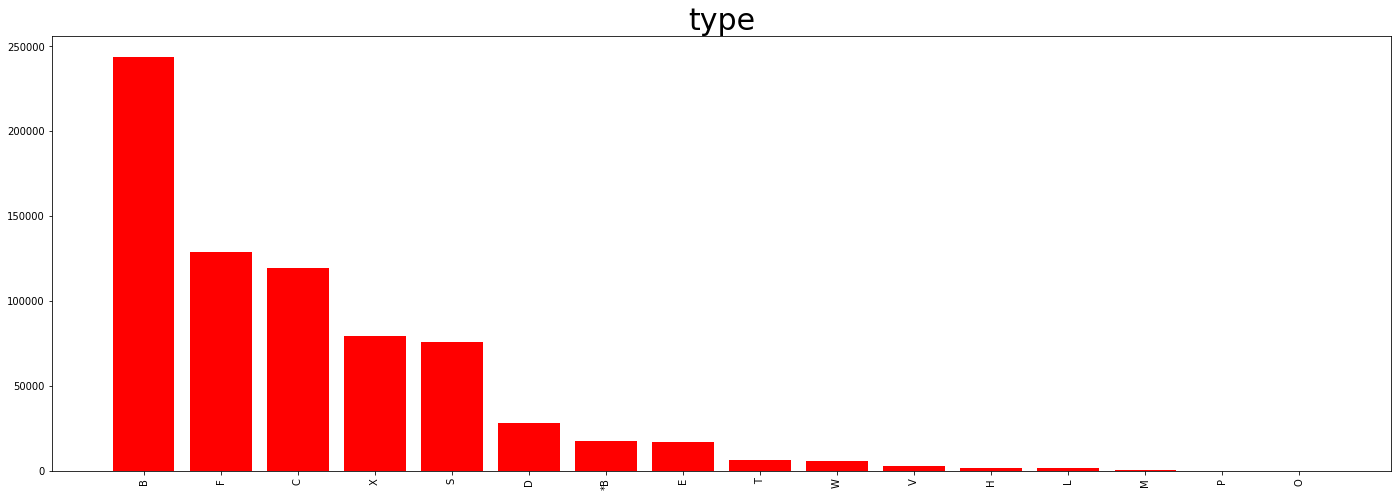

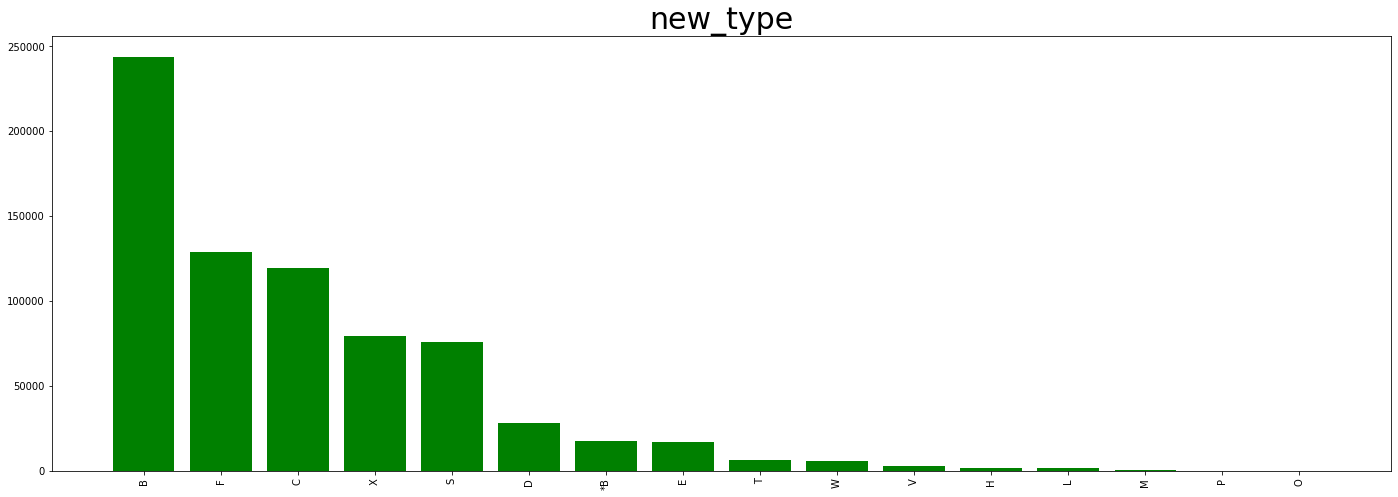

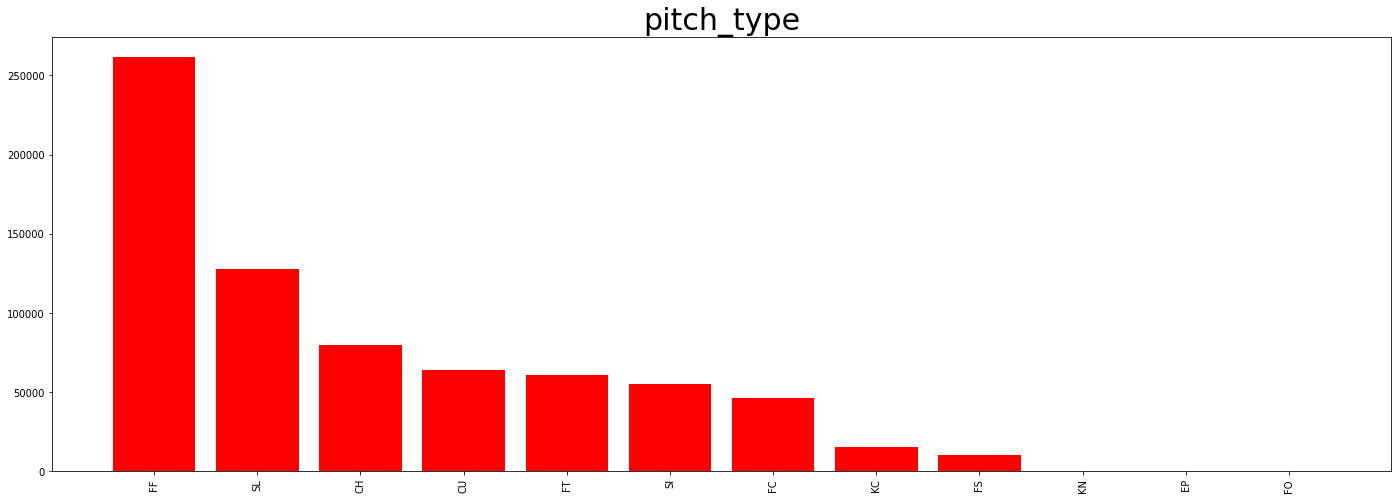

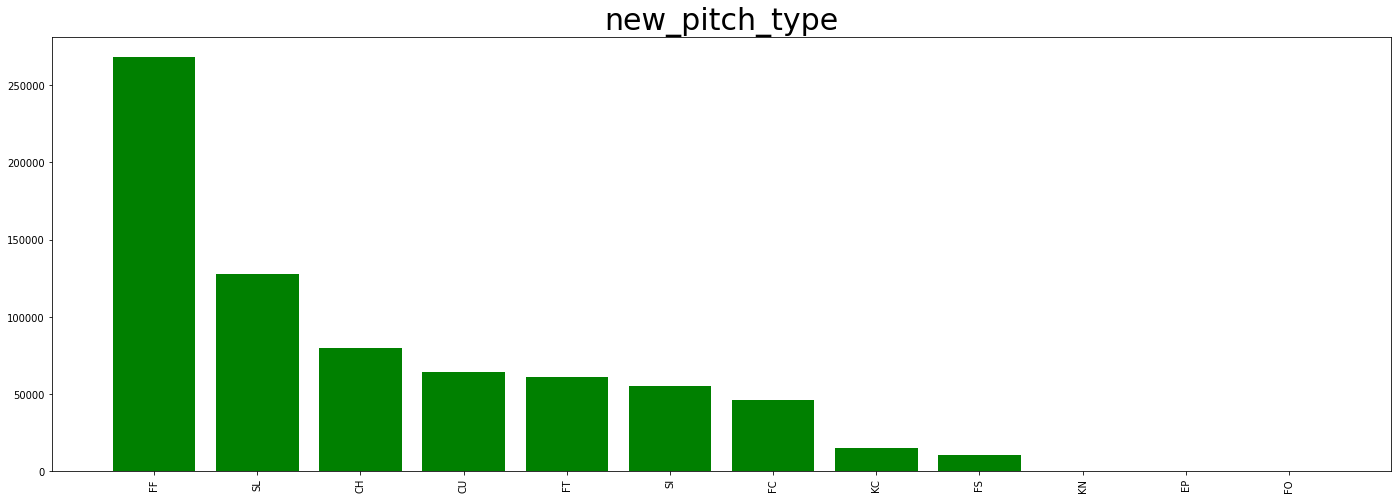

descriptive statistics (px):
Min: -5.0300	Q1(25%): -0.5500 	Q2(50%): 0.0400 	Q3(75%): 0.6200 	Max: 6.2900
Missing: 6629

 new Min: -5.0300	Q1(25%): -0.5400 	Q2(50%): 0.0300 	Q3(75%): 0.6200 	Max: 6.2900 
 new Missing: 0 

descriptive statistics (pz):
Min: -4.1300	Q1(25%): 1.6300 	Q2(50%): 2.2500 	Q3(75%): 2.8700 	Max: 12.2100
Missing: 6629

 new Min: -4.1300	Q1(25%): 1.6300 	Q2(50%): 2.2600 	Q3(75%): 2.8700 	Max: 12.2100 
 new Missing: 0 

descriptive statistics (start_speed):
Min: 50.6000	Q1(25%): 84.5000 	Q2(50%): 89.8000 	Q3(75%): 93.4000 	Max: 104.3000
Missing: 6629

 new Min: 50.6000	Q1(25%): 84.5000 	Q2(50%): 89.9000 	Q3(75%): 93.4000 	Max: 104.3000 
 new Missing: 0 

descriptive statistics (end_speed):
Min: 46.5000	Q1(25%): 78.1000 	Q2(50%): 82.8000 	Q3(75%): 85.8000 	Max: 96.0000
Missing: 6629

 new Min: 46.5000	Q1(25%): 78.2000 	Q2(50%): 82.8000 	Q3(75%): 85.9000 	Max: 96.0000 
 new Missing: 0 



D:\environment\anaconda\anaconda\envs\sjwj\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


"\nmiss_index=['start_speed', 'end_speed']\ncomp_index=['code', 'type']\nrf2019=therelationshipfill(pitches2019,miss_index=miss_index,complete_index=comp_index)\nprint_basic2(pitches2019,new_df=rf2019)\nprint_nominal2(pitches2019,nominal_index=nominal_index,head_n=50,new_df=rf2019)\nprint_numerical2(pitches2019,numerical_index=numerical_index,new_df=rf2019)\nvisualize2(pitches2019,xlabel='start_speed',ylabel='end_speed',bins=20,new_df=rf2019)\n\nsf2019=thesimilarityfill(pitches2019,numerical_index=numerical_index,k=10)\nprint_basic2(pitches2019,new_df=sf2019)\nprint_nominal2(pitches2019,nominal_index=nominal_index,head_n=50,new_df=sf2019)\nprint_numerical2(pitches2019,numerical_index=numerical_index,new_df=sf2019)\nvisualize2(pitches2019,xlabel='start_speed',ylabel='end_speed',bins=20,new_df=sf2019)\n"

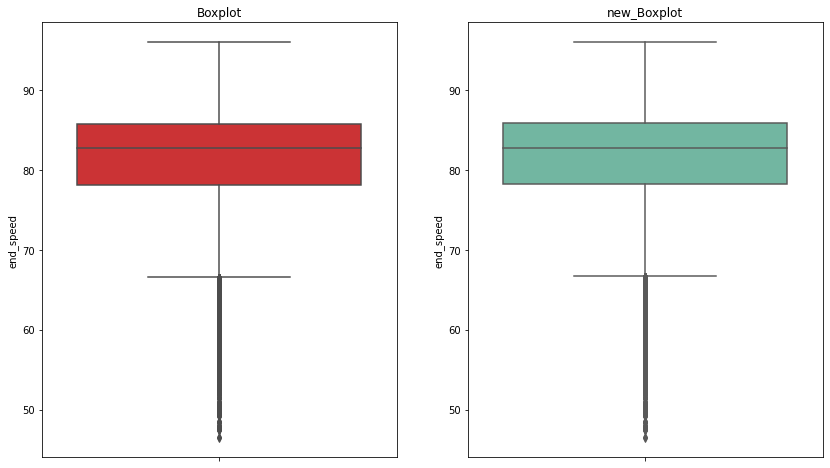

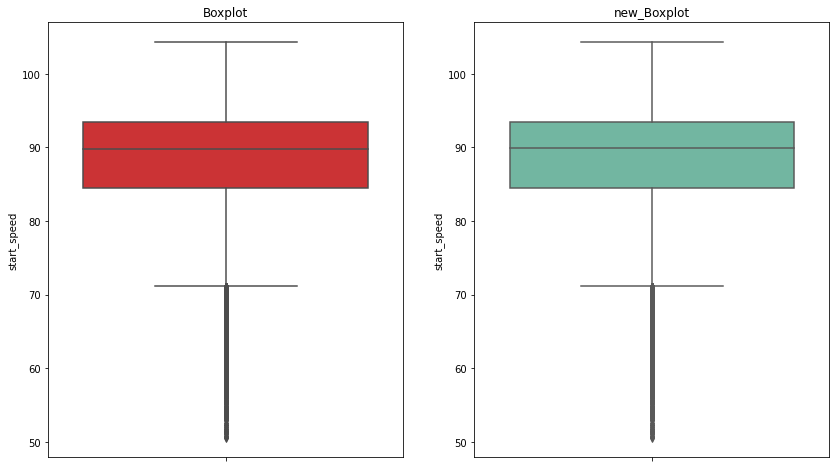

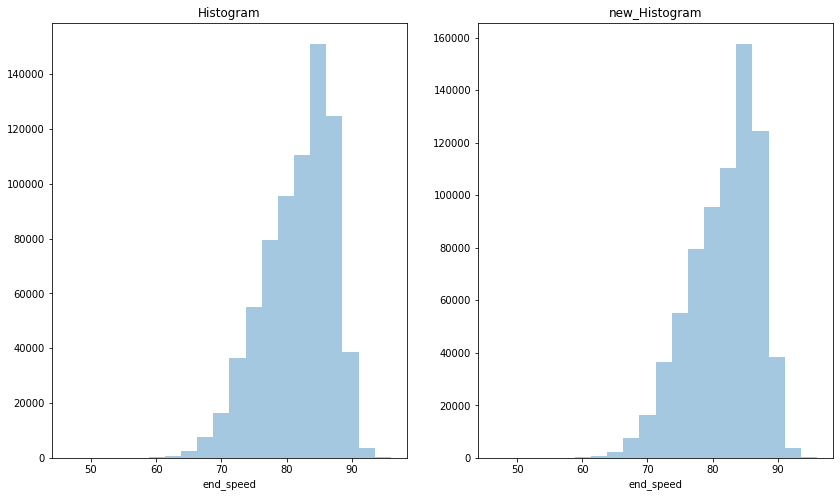

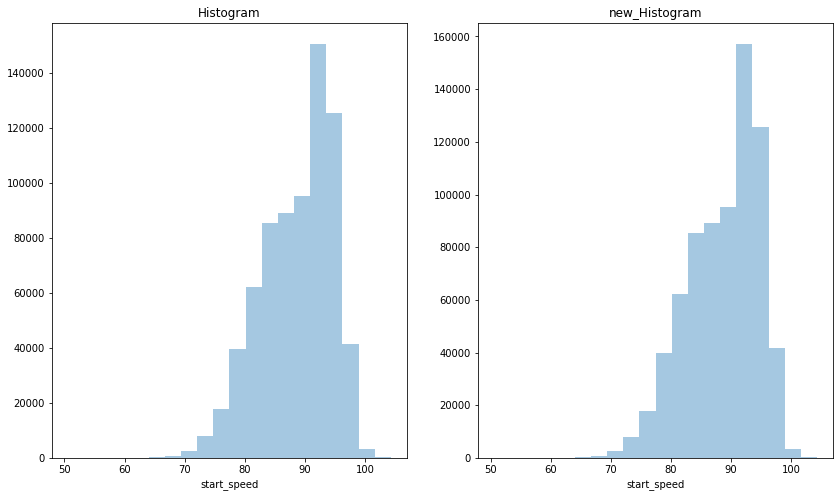

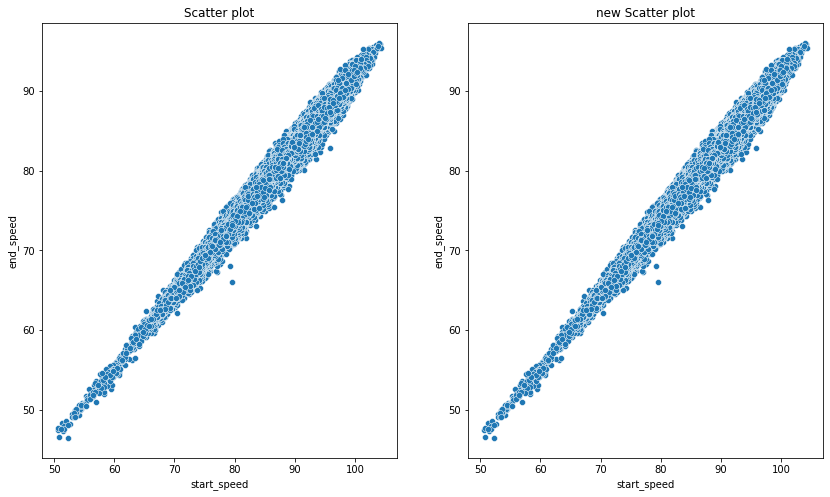

In [11]:
# Nominal index
nominal_index = ['spin_rate', 'spin_dir', 'type_confidence', 'x', 'y', 'zone', 'code', 'type', 'pitch_type']
# Numerical index
numerical_index = ['px', 'pz', 'start_speed', 'end_speed' ]
print_nominal1(pitches2019,nominal_index=nominal_index,head_n=50)
print_numerical1(pitches2019,numerical_index=numerical_index)
visualize1(pitches2019,xlabel='start_speed',ylabel='end_speed',bins=20)

d2019=thedrop(pitches2019)
print_basic2(pitches2019,new_df=d2019)
print_nominal2(pitches2019,nominal_index=nominal_index,head_n=50,new_df=d2019)
print_numerical2(pitches2019,numerical_index=numerical_index,new_df=d2019)
visualize2(pitches2019,xlabel='start_speed',ylabel='end_speed',bins=20,new_df=d2019)

f2019=thefill(pitches2019)
print_basic2(pitches2019,new_df=f2019)
print_nominal2(pitches2019,nominal_index=nominal_index,head_n=50,new_df=f2019)
print_numerical2(pitches2019,numerical_index=numerical_index,new_df=f2019)
visualize2(pitches2019,xlabel='start_speed',ylabel='end_speed',bins=20,new_df=f2019)

miss_index=['start_speed', 'end_speed']
comp_index=['code', 'type']
rf2019=therelationshipfill(pitches2019,miss_index=miss_index,complete_index=comp_index)
print_basic2(pitches2019,new_df=rf2019)
print_nominal2(pitches2019,nominal_index=nominal_index,head_n=50,new_df=rf2019)
print_numerical2(pitches2019,numerical_index=numerical_index,new_df=rf2019)
visualize2(pitches2019,xlabel='start_speed',ylabel='end_speed',bins=20,new_df=rf2019)

sf2019=thesimilarityfill(pitches2019,numerical_index=numerical_index,k=10)
print_basic2(pitches2019,new_df=sf2019)
print_nominal2(pitches2019,nominal_index=nominal_index,head_n=50,new_df=sf2019)
print_numerical2(pitches2019,numerical_index=numerical_index,new_df=sf2019)
visualize2(pitches2019,xlabel='start_speed',ylabel='end_speed',bins=20,new_df=sf2019)